# Quantitative Portfolio Construction

## 1. Data Preparation

### 1.1 Data Extraction

In [239]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [241]:
# Data cleaning for merging with yfinance data
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')

symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',

In [243]:
# Defining date that we want the data for
end_date = '2024-12-31'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
start_date

Timestamp('2017-01-02 00:00:00')

In [245]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

# Download the stock data from yfinance
df = yf.download(tickers=symbols_list,
                start=start_date,
                end=end_date, session=session, auto_adjust=False)

[*********************100%***********************]  503 of 503 completed


In [247]:
df

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2017-01-03   43.651138   26.827248   43.450211         NaN   33.456699   
2017-01-04   44.223885   26.797222   44.062878         NaN   33.722301   
2017-01-05   43.698086   26.933493   44.397053         NaN   34.013599   
2017-01-06   45.059544   27.233753   44.410980         NaN   34.938919   
2017-01-09   45.200382   27.483202   44.703377         NaN   34.904629   
...                ...         ...         ...         ...         ...   
2024-12-23  134.066849  254.655716  175.105225  134.520004  113.188957   
2024-12-24  135.560913  257.578674  176.685593  134.990005  113.634544   
2024-12-26  135.291977  258.396667  175.900314  135.320007  114.139534   
2024-12-27  135.003113  254.974930  174.732224  133.384995  113.862289   
2024-12-30  133.887558  251.593079  172.955551  131.809998  111.693764   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2017-01-03  27.224224  101.952751  103.480003   61.632332  35.965248  ...   
2017-01-04  27.417574  102.197884  104.139999   61.504837  35.902946  ...   
2017-01-05  27.138645  100.665886  105.910004   60.620838  35.638222  ...   
2017-01-06  27.408066  101.812706  108.300003   60.858818  34.820660  ...   
2017-01-09  27.011858  100.674614  108.570000   61.147861  34.844009  ...   
...               ...         ...         ...         ...        ...  ...   
2024-12-23  92.089996  355.488953  446.739990  212.989349  49.345444  ...   
2024-12-24  92.669998  358.322815  447.940002  216.161057  49.560802  ...   
2024-12-26  92.930000  357.133789  450.160004  216.131317  49.541222  ...   
2024-12-27  92.339996  352.922638  446.480011  215.070786  49.511856  ...   
2024-12-30  91.889999  349.266388  445.799988  210.679977  49.012623  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2017-01-03  789800  2650200  2703500  2065100  10360600  1596700  4793400   
2017-01-04  477200  3678500  2598800  2542600   9434200  1703000  2835200   
2017-01-05  583600  3548000  2507500  2611900  14443200  1846000  4040000   
2017-01-06  812200  2679300  1858400  1707400  16518100  1561600  2863800   
2017-01-09  467800  4017600  2776200  1840100  13762300  1090400  1944200   
...            ...      ...      ...      ...       ...      ...      ...   
2024-12-23  411300  3546700  1312400  2535600  12285100   945800  1479100   
2024-12-24  191200  1780100   692800   943900   7807000   379300   533000   
2024-12-26  258700  1736500  1218900  1394900   9652400   575700  1040900   
2024-12-27  310700  2320500  1086700  2015000  11943900   552400  1146300   
2024-12-30  320300  2914700  2180100  2642900  11080800   586800  1144600   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2017-01-03  1422533  388200  3579700  
2017-01-04  1547884  463200  3316300  
2017-01-05  1497517  486600  2469100  
2017-01-06  1875630  308300  2845800  
2017-01-09  1198199  263300  2123300  
...             ...     ...      ...  
2024-12-23  1948300  238300  2437800  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  

[2011 rows x 3018 columns]

Creating a copy of df in case we need it again

In [250]:
df_copy = df.copy()
df_copy

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2017-01-03   43.651138   26.827248   43.450211         NaN   33.456699   
2017-01-04   44.223885   26.797222   44.062878         NaN   33.722301   
2017-01-05   43.698086   26.933493   44.397053         NaN   34.013599   
2017-01-06   45.059544   27.233753   44.410980         NaN   34.938919   
2017-01-09   45.200382   27.483202   44.703377         NaN   34.904629   
...                ...         ...         ...         ...         ...   
2024-12-23  134.066849  254.655716  175.105225  134.520004  113.188957   
2024-12-24  135.560913  257.578674  176.685593  134.990005  113.634544   
2024-12-26  135.291977  258.396667  175.900314  135.320007  114.139534   
2024-12-27  135.003113  254.974930  174.732224  133.384995  113.862289   
2024-12-30  133.887558  251.593079  172.955551  131.809998  111.693764   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2017-01-03  27.224224  101.952751  103.480003   61.632332  35.965248  ...   
2017-01-04  27.417574  102.197884  104.139999   61.504837  35.902946  ...   
2017-01-05  27.138645  100.665886  105.910004   60.620838  35.638222  ...   
2017-01-06  27.408066  101.812706  108.300003   60.858818  34.820660  ...   
2017-01-09  27.011858  100.674614  108.570000   61.147861  34.844009  ...   
...               ...         ...         ...         ...        ...  ...   
2024-12-23  92.089996  355.488953  446.739990  212.989349  49.345444  ...   
2024-12-24  92.669998  358.322815  447.940002  216.161057  49.560802  ...   
2024-12-26  92.930000  357.133789  450.160004  216.131317  49.541222  ...   
2024-12-27  92.339996  352.922638  446.480011  215.070786  49.511856  ...   
2024-12-30  91.889999  349.266388  445.799988  210.679977  49.012623  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2017-01-03  789800  2650200  2703500  2065100  10360600  1596700  4793400   
2017-01-04  477200  3678500  2598800  2542600   9434200  1703000  2835200   
2017-01-05  583600  3548000  2507500  2611900  14443200  1846000  4040000   
2017-01-06  812200  2679300  1858400  1707400  16518100  1561600  2863800   
2017-01-09  467800  4017600  2776200  1840100  13762300  1090400  1944200   
...            ...      ...      ...      ...       ...      ...      ...   
2024-12-23  411300  3546700  1312400  2535600  12285100   945800  1479100   
2024-12-24  191200  1780100   692800   943900   7807000   379300   533000   
2024-12-26  258700  1736500  1218900  1394900   9652400   575700  1040900   
2024-12-27  310700  2320500  1086700  2015000  11943900   552400  1146300   
2024-12-30  320300  2914700  2180100  2642900  11080800   586800  1144600   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2017-01-03  1422533  388200  3579700  
2017-01-04  1547884  463200  3316300  
2017-01-05  1497517  486600  2469100  
2017-01-06  1875630  308300  2845800  
2017-01-09  1198199  263300  2123300  
...             ...     ...      ...  
2024-12-23  1948300  238300  2437800  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  

[2011 rows x 3018 columns]

In [252]:
df = df_copy.copy()
df

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2017-01-03   43.651138   26.827248   43.450211         NaN   33.456699   
2017-01-04   44.223885   26.797222   44.062878         NaN   33.722301   
2017-01-05   43.698086   26.933493   44.397053         NaN   34.013599   
2017-01-06   45.059544   27.233753   44.410980         NaN   34.938919   
2017-01-09   45.200382   27.483202   44.703377         NaN   34.904629   
...                ...         ...         ...         ...         ...   
2024-12-23  134.066849  254.655716  175.105225  134.520004  113.188957   
2024-12-24  135.560913  257.578674  176.685593  134.990005  113.634544   
2024-12-26  135.291977  258.396667  175.900314  135.320007  114.139534   
2024-12-27  135.003113  254.974930  174.732224  133.384995  113.862289   
2024-12-30  133.887558  251.593079  172.955551  131.809998  111.693764   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2017-01-03  27.224224  101.952751  103.480003   61.632332  35.965248  ...   
2017-01-04  27.417574  102.197884  104.139999   61.504837  35.902946  ...   
2017-01-05  27.138645  100.665886  105.910004   60.620838  35.638222  ...   
2017-01-06  27.408066  101.812706  108.300003   60.858818  34.820660  ...   
2017-01-09  27.011858  100.674614  108.570000   61.147861  34.844009  ...   
...               ...         ...         ...         ...        ...  ...   
2024-12-23  92.089996  355.488953  446.739990  212.989349  49.345444  ...   
2024-12-24  92.669998  358.322815  447.940002  216.161057  49.560802  ...   
2024-12-26  92.930000  357.133789  450.160004  216.131317  49.541222  ...   
2024-12-27  92.339996  352.922638  446.480011  215.070786  49.511856  ...   
2024-12-30  91.889999  349.266388  445.799988  210.679977  49.012623  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2017-01-03  789800  2650200  2703500  2065100  10360600  1596700  4793400   
2017-01-04  477200  3678500  2598800  2542600   9434200  1703000  2835200   
2017-01-05  583600  3548000  2507500  2611900  14443200  1846000  4040000   
2017-01-06  812200  2679300  1858400  1707400  16518100  1561600  2863800   
2017-01-09  467800  4017600  2776200  1840100  13762300  1090400  1944200   
...            ...      ...      ...      ...       ...      ...      ...   
2024-12-23  411300  3546700  1312400  2535600  12285100   945800  1479100   
2024-12-24  191200  1780100   692800   943900   7807000   379300   533000   
2024-12-26  258700  1736500  1218900  1394900   9652400   575700  1040900   
2024-12-27  310700  2320500  1086700  2015000  11943900   552400  1146300   
2024-12-30  320300  2914700  2180100  2642900  11080800   586800  1144600   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2017-01-03  1422533  388200  3579700  
2017-01-04  1547884  463200  3316300  
2017-01-05  1497517  486600  2469100  
2017-01-06  1875630  308300  2845800  
2017-01-09  1198199  263300  2123300  
...             ...     ...      ...  
2024-12-23  1948300  238300  2437800  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  

[2011 rows x 3018 columns]

### 1.2 Data Cleaning

We need to change the df format to a stack, such that we have more rows, and less columns, where the columns are simply the metrics, and the rows are a unique combination of date and ticker symbol.

In [256]:
df = df.stack()
df

Price               Adj Close       Close        High         Low        Open  \
Date       Ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   Volume  
Date       Ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-30 XYL        586800.0  
           YUM       1144600.0  
           ZBH       1532000.0  
           ZBRA       211300.0  
           ZTS       1531400.0  

[988657 rows x 6 columns]

In [258]:
df.index.names = ['date', 'ticker']
df

Price               Adj Close       Close        High         Low        Open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   Volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-30 XYL        586800.0  
           YUM       1144600.0  
           ZBH       1532000.0  
           ZBRA       211300.0  
           ZTS       1531400.0  

[988657 rows x 6 columns]

Changing the column names to lower case

In [261]:
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  
date       ticker               
2017-01-03 A         1739600.0  
           AAPL    115127600.0  
           ABBV      9328200.0  
           ABT       9677300.0  
           ACGL       942900.0  
...                        ...  
2024-12-30 XYL        586800.0  
           YUM       1144600.0  
           ZBH       1532000.0  
           ZBRA       211300.0  
           ZTS       1531400.0  

[988657 rows x 6 columns]

## 2. Exploration of Technical Indicators and Features of Stocks

Feature Engineering for the following features/indicators:
1. Garman-Klass Volatility
2. RSI
3. Bollinger Bands
4. ATR
5. MACD

### 2.1 Garman-Klass Volatility

Garman-Klass volatility uses **open, high, low, and closing prices** to provide a more accurate estimate of a stock's volatility than typical methods that only consider closing prices. It captures **intraday price movements** and is often used to **assess the risk associated with a stock**, especially in relation to its potential for rapid price changes.

It is calculated as follows:
$$
\text{Garman--Klass Volatility}
= \frac{\bigl(\ln(\mathrm{High}) - \ln(\mathrm{Low})\bigr)^2}{2}
\;-\;\bigl(2\ln(2)-1\bigr)\,\bigl(\ln(\mathrm{Adj\ Close}) - \ln(\mathrm{Open})\bigr)^2
$$


In [267]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2*np.log(2) - 1)*((np.log(df['adj close']) - np.log(df['open']))**2)

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol  
date       ticker                                 
2017-01-03 A         1739600.0         -0.000762  
           AAPL    115127600.0         -0.002148  
           ABBV      9328200.0         -0.052803  
           ABT       9677300.0         -0.007803  
           ACGL       942900.0         -0.001204  
...                        ...               ...  
2024-12-30 XYL        586800.0          0.000076  
           YUM       1144600.0         -0.000022  
           ZBH       1532000.0          0.000103  
           ZBRA       211300.0          0.000261  
           ZTS       1531400.0          0.000022  

[988657 rows x 7 columns]

### 2.2 RSI

The Relative Strength Index (RSI) is a technical indicator that measures the **speed and magnitude of price changes on a stock**, providing insights into its momentum. It's often used to identify **potential overbought or oversold conditions**.

In [271]:
RSI_LEN = 60
df['rsi'] = df.groupby(level=1)['adj close'] \
              .transform(lambda x: pandas_ta.rsi(close=x, length=RSI_LEN))

In [272]:
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol        rsi  
date       ticker                                            
2017-01-03 A         1739600.0         -0.000762        NaN  
           AAPL    115127600.0         -0.002148        NaN  
           ABBV      9328200.0         -0.052803        NaN  
           ABT       9677300.0         -0.007803        NaN  
           ACGL       942900.0         -0.001204        NaN  
...                        ...               ...        ...  
2024-12-30 XYL        586800.0          0.000076  42.664267  
           YUM       1144600.0         -0.000022  49.429786  
           ZBH       1532000.0          0.000103  47.102823  
           ZBRA       211300.0          0.000261  53.166639  
           ZTS       1531400.0          0.000022  42.537529  

[988657 rows x 8 columns]

Plotting RSI of AAPL to check

<Axes: xlabel='date'>

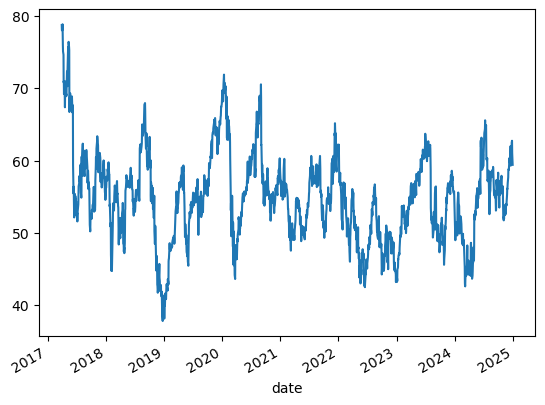

In [276]:
df.xs('AAPL', level=1)['rsi'].plot()

### 2.3 Bollinger Bands

Bollinger Bands are a technical analysis tool that helps traders assess a stock's price **volatility** and identify potential trading opportunities. They consist of a **middle band (a moving average) and two outer bands (standard deviations away from the moving average)**. By observing how the price moves in relation to these bands, traders can gauge whether a stock is **overbought, oversold, or experiencing a potential trend change**.

We will be calculating the 3 different Bollinger Bands (low, mid, high) below:

In [280]:
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000762        NaN       NaN   
           AAPL    115127600.0         -0.002148        NaN       NaN   
           ABBV      9328200.0         -0.052803        NaN       NaN   
           ABT       9677300.0         -0.007803        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000076  42.664267  4.731013   
           YUM       1144600.0         -0.000022  49.429786  4.872236   
           ZBH       1532000.0          0.000103  47.102823  4.656261   
           ZBRA       211300.0          0.000261  53.166639  5.946061   
           ZTS       1531400.0          0.000022  42.537529  5.074098   

Price                bb_mid   bb_high  
date       ticker                      
2017-01-03 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2024-12-30 XYL     4.804377  4.877741  
           YUM     4.910162  4.948089  
           ZBH     4.684597  4.712934  
           ZBRA    5.992536  6.039010  
           ZTS     5.144206  5.214314  

[988657 rows x 11 columns]

### 2.4 ATR

The Average True Range (ATR) is a technical analysis indicator that measures **price volatility over a specific period, typically 14 days**. It helps traders understand how much a stock's price fluctuates and can be used to **set stop-loss levels and manage risk**. 

In [284]:
pandas_ta.atr(high=df['high'],
             low=df['low'],
             close=df['close'],
             length=14)

date        ticker
2017-01-03  A                NaN
            AAPL             NaN
            ABBV             NaN
            ABT              NaN
            ACGL             NaN
                         ...    
2024-12-30  XYL       113.406422
            YUM       106.600963
            ZBH       101.048752
            ZBRA      113.942412
            ZTS       121.689383
Name: ATRr_14, Length: 988657, dtype: float64

In [286]:
def compute_atr(stock_data):
    return pandas_ta.atr(high=stock_data['high'],
             low=stock_data['low'],
             close=stock_data['close'],
             length=14) 

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000762        NaN       NaN   
           AAPL    115127600.0         -0.002148        NaN       NaN   
           ABBV      9328200.0         -0.052803        NaN       NaN   
           ABT       9677300.0         -0.007803        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000076  42.664267  4.731013   
           YUM       1144600.0         -0.000022  49.429786  4.872236   
           ZBH       1532000.0          0.000103  47.102823  4.656261   
           ZBRA       211300.0          0.000261  53.166639  5.946061   
           ZTS       1531400.0          0.000022  42.537529  5.074098   

Price                bb_mid   bb_high       atr  
date       ticker                                
2017-01-03 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
...                     ...       ...       ...  
2024-12-30 XYL     4.804377  4.877741  2.386766  
           YUM     4.910162  4.948089  2.355795  
           ZBH     4.684597  4.712934  2.114050  
           ZBRA    5.992536  6.039010  8.431001  
           ZTS     5.144206  5.214314  3.595311  

[988657 rows x 12 columns]

### 2.5 MACD

The MACD (Moving Average Convergence Divergence) is a technical indicator that helps investors **identify trends, momentum, and potential entry and exit points** for trades in a stock. It does this by **showing the relationship between two exponential moving averages (EMAs) of a stock's price**. 

In [290]:
def compute_macd(close):
    return pandas_ta.macd(close=close, length=20).iloc[:,0]

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000762        NaN       NaN   
           AAPL    115127600.0         -0.002148        NaN       NaN   
           ABBV      9328200.0         -0.052803        NaN       NaN   
           ABT       9677300.0         -0.007803        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000076  42.664267  4.731013   
           YUM       1144600.0         -0.000022  49.429786  4.872236   
           ZBH       1532000.0          0.000103  47.102823  4.656261   
           ZBRA       211300.0          0.000261  53.166639  5.946061   
           ZTS       1531400.0          0.000022  42.537529  5.074098   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-01-03 A            NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-12-30 XYL     4.804377  4.877741  2.386766 -2.394494  
           YUM     4.910162  4.948089  2.355795 -0.435059  
           ZBH     4.684597  4.712934  2.114050 -0.673295  
           ZBRA    5.992536  6.039010  8.431001 -1.512806  
           ZTS     5.144206  5.214314  3.595311 -3.847378  

[988657 rows x 13 columns]

### 2.6 Dollar Volume

We are using the Dollar Volume statistic for filtering the 5y rolling average dollar volume in section 3, to filter the top 100 most liquid stocks every month. This statistic will be deleted afterwards as it is not a technical indicator feature we will be backtesting any trading signals on.

We divide by 1M to make the number smaller rather than model on huge numbers, and so dollar_volume is in millions

In [294]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2017-01-03 A        43.651138   46.490002   46.750000   45.740002   45.930000   
           AAPL     26.827248   29.037500   29.082500   28.690001   28.950001   
           ABBV     43.450211   62.410000   63.029999   61.939999   62.919998   
           ABT      33.456699   39.049999   39.080002   38.340000   38.630001   
           ACGL     27.224224   28.629999   29.143333   28.506666   28.943333   
...                       ...         ...         ...         ...         ...   
2024-12-30 XYL     115.551468  116.279999  116.800003  115.160004  116.459999   
           YUM     132.243332  133.520004  134.410004  133.000000  134.130005   
           ZBH     105.174667  105.400002  106.349998  104.650002  106.050003   
           ZBRA    383.850006  383.850006  386.959991  378.149994  385.059998   
           ZTS     161.207016  162.240005  164.050003  161.449997  163.889999   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2017-01-03 A         1739600.0         -0.000762        NaN       NaN   
           AAPL    115127600.0         -0.002148        NaN       NaN   
           ABBV      9328200.0         -0.052803        NaN       NaN   
           ABT       9677300.0         -0.007803        NaN       NaN   
           ACGL       942900.0         -0.001204        NaN       NaN   
...                        ...               ...        ...       ...   
2024-12-30 XYL        586800.0          0.000076  42.664267  4.731013   
           YUM       1144600.0         -0.000022  49.429786  4.872236   
           ZBH       1532000.0          0.000103  47.102823  4.656261   
           ZBRA       211300.0          0.000261  53.166639  5.946061   
           ZTS       1531400.0          0.000022  42.537529  5.074098   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2017-01-03 A            NaN       NaN       NaN       NaN      75.935520  
           AAPL         NaN       NaN       NaN       NaN    3088.556633  
           ABBV         NaN       NaN       NaN       NaN     405.312254  
           ABT          NaN       NaN       NaN       NaN     323.770517  
           ACGL         NaN       NaN       NaN       NaN      25.669721  
...                     ...       ...       ...       ...            ...  
2024-12-30 XYL     4.804377  4.877741  2.386766 -2.394494      67.805601  
           YUM     4.910162  4.948089  2.355795 -0.435059     151.365718  
           ZBH     4.684597  4.712934  2.114050 -0.673295     161.127590  
           ZBRA    5.992536  6.039010  8.431001 -1.512806      81.107506  
           ZTS     5.144206  5.214314  3.595311 -3.847378     246.872424  

[988657 rows x 14 columns]

## 3. Aggregate to monthly level and filter top 100 most liquid stocks for each month

We will be extracting the **top 100 most liquid companies by 5y rolling average dollar_volume**, and aggregating the features to **monthly level** for just the technical indicators (not open/close/high/low type of stats).

In [298]:
# Demo-ing the process for unstacking and aggregating the dollar_volume column 
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date       ticker               
2017-01-31 A          101.944071
           AAPL      3113.181609
           ABBV       338.538879
           ABT        368.277066
           ACGL        29.688113
...                          ...
2024-12-31 XYL        165.083143
           YUM        206.888270
           ZBH        165.112289
           ZBRA       121.040691
           ZTS        414.343721

[47204 rows x 1 columns]

Obtain the list of columns of technical indicators we want to aggregate the data for

In [301]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
last_cols

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [303]:
df.unstack()[last_cols].resample('M').last().stack('ticker')

Price               adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2017-01-31 A        45.979694  0.911583  3.858836  3.799715  3.829275   
           AAPL     28.028294  0.278535  3.382406  3.325405  3.353906   
           ABBV     42.974419  1.169094  3.824005  3.761620  3.792813   
           ABT      36.018272  0.684709  3.614911  3.548354  3.581633   
           ACGL     28.003962  0.389193  3.380080  3.331300  3.355690   
...                       ...       ...       ...       ...       ...   
2024-12-31 XYL     115.551468  2.386766  4.877741  4.731013  4.804377   
           YUM     132.243332  2.355795  4.948089  4.872236  4.910162   
           ZBH     105.174667  2.114050  4.712934  4.656261  4.684597   
           ZBRA    383.850006  8.431001  6.039010  5.946061  5.992536   
           ZTS     161.207016  3.595311  5.214314  5.074098  5.144206   

Price              garman_klass_vol      macd        rsi  
date       ticker                                         
2017-01-31 A              -0.000467       NaN        NaN  
           AAPL           -0.002301       NaN        NaN  
           ABBV           -0.042733       NaN        NaN  
           ABT            -0.005421       NaN        NaN  
           ACGL           -0.001044       NaN        NaN  
...                             ...       ...        ...  
2024-12-31 XYL             0.000076 -2.394494  42.664267  
           YUM            -0.000022 -0.435059  49.429786  
           ZBH             0.000103 -0.673295  47.102823  
           ZBRA            0.000261 -1.512806  53.166639  
           ZTS             0.000022 -3.847378  42.537529  

[47204 rows x 8 columns]

In [305]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
          df.unstack()[last_cols].resample('M').last().stack('ticker')],
         axis=1)).dropna()
data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2017-03-31 A           87.885565   49.764748  0.808607  3.951439  3.891365   
           AAPL      3187.666293   33.325111  0.386370  3.540072  3.492284   
           ABBV       284.212807   45.822498  0.772811  3.873326  3.826205   
           ABT        251.861127   38.294739  0.515556  3.699162  3.668211   
           ACGL        26.653848   30.038885  0.373049  3.448372  3.416247   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        165.083143  115.551468  2.386766  4.877741  4.731013   
           YUM        206.888270  132.243332  2.355795  4.948089  4.872236   
           ZBH        165.112289  105.174667  2.114050  4.712934  4.656261   
           ZBRA       121.040691  383.850006  8.431001  6.039010  5.946061   
           ZTS        414.343721  161.207016  3.595311  5.214314  5.074098   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2017-03-31 A       3.921402         -0.001566  0.575563  61.017298  
           AAPL    3.516178         -0.002150  0.574513  78.038056  
           ABBV    3.849766         -0.049124  0.508904  58.878469  
           ABT     3.683687         -0.008213  0.106513  62.853850  
           ACGL    3.432309         -0.001097  0.127007  63.223701  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.804377          0.000076 -2.394494  42.664267  
           YUM     4.910162         -0.000022 -0.435059  49.429786  
           ZBH     4.684597          0.000103 -0.673295  47.102823  
           ZBRA    5.992536          0.000261 -1.512806  53.166639  
           ZTS     5.144206          0.000022 -3.847378  42.537529  

[46178 rows x 9 columns]

Calculate the 5-year rolling average of dollar volume for each stock before filtering the top 100

In [307]:
data_copy = data.copy()
data_copy

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2017-03-31 A           87.885565   49.764748  0.808607  3.951439  3.891365   
           AAPL      3187.666293   33.325111  0.386370  3.540072  3.492284   
           ABBV       284.212807   45.822498  0.772811  3.873326  3.826205   
           ABT        251.861127   38.294739  0.515556  3.699162  3.668211   
           ACGL        26.653848   30.038885  0.373049  3.448372  3.416247   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        165.083143  115.551468  2.386766  4.877741  4.731013   
           YUM        206.888270  132.243332  2.355795  4.948089  4.872236   
           ZBH        165.112289  105.174667  2.114050  4.712934  4.656261   
           ZBRA       121.040691  383.850006  8.431001  6.039010  5.946061   
           ZTS        414.343721  161.207016  3.595311  5.214314  5.074098   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2017-03-31 A       3.921402         -0.001566  0.575563  61.017298  
           AAPL    3.516178         -0.002150  0.574513  78.038056  
           ABBV    3.849766         -0.049124  0.508904  58.878469  
           ABT     3.683687         -0.008213  0.106513  62.853850  
           ACGL    3.432309         -0.001097  0.127007  63.223701  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.804377          0.000076 -2.394494  42.664267  
           YUM     4.910162         -0.000022 -0.435059  49.429786  
           ZBH     4.684597          0.000103 -0.673295  47.102823  
           ZBRA    5.992536          0.000261 -1.512806  53.166639  
           ZTS     5.144206          0.000022 -3.847378  42.537529  

[46178 rows x 9 columns]

In [310]:
data = data_copy.copy()
data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2017-03-31 A           87.885565   49.764748  0.808607  3.951439  3.891365   
           AAPL      3187.666293   33.325111  0.386370  3.540072  3.492284   
           ABBV       284.212807   45.822498  0.772811  3.873326  3.826205   
           ABT        251.861127   38.294739  0.515556  3.699162  3.668211   
           ACGL        26.653848   30.038885  0.373049  3.448372  3.416247   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        165.083143  115.551468  2.386766  4.877741  4.731013   
           YUM        206.888270  132.243332  2.355795  4.948089  4.872236   
           ZBH        165.112289  105.174667  2.114050  4.712934  4.656261   
           ZBRA       121.040691  383.850006  8.431001  6.039010  5.946061   
           ZTS        414.343721  161.207016  3.595311  5.214314  5.074098   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2017-03-31 A       3.921402         -0.001566  0.575563  61.017298  
           AAPL    3.516178         -0.002150  0.574513  78.038056  
           ABBV    3.849766         -0.049124  0.508904  58.878469  
           ABT     3.683687         -0.008213  0.106513  62.853850  
           ACGL    3.432309         -0.001097  0.127007  63.223701  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.804377          0.000076 -2.394494  42.664267  
           YUM     4.910162         -0.000022 -0.435059  49.429786  
           ZBH     4.684597          0.000103 -0.673295  47.102823  
           ZBRA    5.992536          0.000261 -1.512806  53.166639  
           ZTS     5.144206          0.000022 -3.847378  42.537529  

[46178 rows x 9 columns]

In [312]:
data_copy[data_copy.index.get_level_values('ticker') == 'AAPL']
# factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
# factor_data

,,dollar_volume,adj close,atr,bb_high,bb_low,bb_mid,garman_klass_vol,macd,rsi
date,ticker,,,,,,,,,
2017-03-31,AAPL,3187.666293,33.325111,0.386370,3.540072,3.492284,3.516178,-0.002150,0.574513,78.038056
2017-04-30,AAPL,2605.340771,33.322796,0.342718,3.546906,3.514831,3.530869,-0.002319,0.213226,68.929640
2017-05-31,AAPL,4197.198677,35.582340,0.463041,3.633017,3.563268,3.598143,-0.002319,0.519182,66.968108
2017-06-30,AAPL,4268.541232,33.546520,0.638578,3.614963,3.511176,3.563069,-0.002065,-0.379695,52.757318
2017-07-31,AAPL,2915.393090,34.643612,0.578318,3.612307,3.528763,3.570535,-0.002275,0.236659,54.869650
...,...,...,...,...,...,...,...,...,...,...
2024-08-31,AAPL,11180.444681,228.197845,4.729086,5.466367,5.338452,5.402410,0.000052,2.825768,58.778101
2024-09-30,AAPL,13792.914159,232.183838,4.595173,5.448383,5.374336,5.411359,0.000072,1.874391,58.327570
2024-10-31,AAPL,9276.408164,225.118683,4.111933,5.473195,5.409863,5.441529,0.000059,1.114151,53.247117


In [314]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2017-03-31 A                 NaN   49.764748  0.808607  3.951439  3.891365   
           AAPL              NaN   33.325111  0.386370  3.540072  3.492284   
           ABBV              NaN   45.822498  0.772811  3.873326  3.826205   
           ABT               NaN   38.294739  0.515556  3.699162  3.668211   
           ACGL              NaN   30.038885  0.373049  3.448372  3.416247   
...                          ...         ...       ...       ...       ...   
2024-12-31 XYL        121.918521  115.551468  2.386766  4.877741  4.731013   
           YUM        200.068570  132.243332  2.355795  4.948089  4.872236   
           ZBH        178.083456  105.174667  2.114050  4.712934  4.656261   
           ZBRA       124.836068  383.850006  8.431001  6.039010  5.946061   
           ZTS        343.506090  161.207016  3.595311  5.214314  5.074098   

                     bb_mid  garman_klass_vol      macd        rsi  
date       ticker                                                   
2017-03-31 A       3.921402         -0.001566  0.575563  61.017298  
           AAPL    3.516178         -0.002150  0.574513  78.038056  
           ABBV    3.849766         -0.049124  0.508904  58.878469  
           ABT     3.683687         -0.008213  0.106513  62.853850  
           ACGL    3.432309         -0.001097  0.127007  63.223701  
...                     ...               ...       ...        ...  
2024-12-31 XYL     4.804377          0.000076 -2.394494  42.664267  
           YUM     4.910162         -0.000022 -0.435059  49.429786  
           ZBH     4.684597          0.000103 -0.673295  47.102823  
           ZBRA    5.992536          0.000261 -1.512806  53.166639  
           ZTS     5.144206          0.000022 -3.847378  42.537529  

[46178 rows x 9 columns]

Creating a column to rank the 500 companies on 5y rolling average of dollar volume, then filtering for only top 100 each month

In [317]:
data['dollar_vol_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)

data = data[data['dollar_vol_rank'] < 100]

data

dollar_volume   adj close       atr   bb_high    bb_low  \
date       ticker                                                            
2018-02-28 AAPL      4290.734691   41.972511  0.949167  3.788002  3.609969   
           ABBV       363.861478   84.183670  3.973557  4.495177  4.375935   
           ABT        284.107508   53.140785  1.168932  4.027098  3.923175   
           ADBE       402.115974  209.130005  4.963634  5.371634  5.223541   
           AIG        295.631542   47.362415  1.296827  3.980039  3.870353   
...                          ...         ...       ...       ...       ...   
2024-12-31 V         1693.401444  314.258423  4.734250  5.774272  5.728013   
           VZ         761.570988   38.295414  0.630423  3.776976  3.648898   
           WFC        996.871808   69.681808  1.576222  4.322447  4.229367   
           WMT       1072.350592   90.104118  1.666243  4.573415  4.512217   
           XOM       1551.641086  103.865776  1.825598  4.764497  4.621063   

                     bb_mid  garman_klass_vol      macd        rsi  \
date       ticker                                                    
2018-02-28 AAPL    3.698985         -0.001556  0.539260  56.091771   
           ABBV    4.435556         -0.045638  2.242367  59.934443   
           ABT     3.975136         -0.006662  0.211448  57.568874   
           ADBE    5.297587          0.000190  4.852130  61.686286   
           AIG     3.925196         -0.017116 -0.634970  43.915673   
...                     ...               ...       ...        ...   
2024-12-31 V       5.751142          0.000075  3.321607  58.127186   
           VZ      3.712937         -0.000512 -0.716492  45.818826   
           WFC     4.275907          0.000066 -0.150626  55.802636   
           WMT     4.542816          0.000035  0.860152  59.942527   
           XOM     4.692780         -0.000158 -3.027222  42.823521   

                   dollar_vol_rank  
date       ticker                   
2018-02-28 AAPL                1.0  
           ABBV               66.0  
           ABT                94.0  
           ADBE               60.0  
           AIG                90.0  
...                            ...  
2024-12-31 V                  13.0  
           VZ                 59.0  
           WFC                39.0  
           WMT                37.0  
           XOM                15.0  

[8217 rows x 10 columns]

Drop the 2 columns (dollar_volume, dollar_vol_rank) as we have successfully extracted the top 100 most liquid companies and their features each month, and do not require dollar_volume values anymore.

In [320]:
data = data.drop(['dollar_volume', 'dollar_vol_rank'], axis=1)
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-02-28 AAPL     41.972511  0.949167  3.788002  3.609969  3.698985   
           ABBV     84.183670  3.973557  4.495177  4.375935  4.435556   
           ABT      53.140785  1.168932  4.027098  3.923175  3.975136   
           ADBE    209.130005  4.963634  5.371634  5.223541  5.297587   
           AIG      47.362415  1.296827  3.980039  3.870353  3.925196   
...                       ...       ...       ...       ...       ...   
2024-12-31 V       314.258423  4.734250  5.774272  5.728013  5.751142   
           VZ       38.295414  0.630423  3.776976  3.648898  3.712937   
           WFC      69.681808  1.576222  4.322447  4.229367  4.275907   
           WMT      90.104118  1.666243  4.573415  4.512217  4.542816   
           XOM     103.865776  1.825598  4.764497  4.621063  4.692780   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2018-02-28 AAPL           -0.001556  0.539260  56.091771  
           ABBV           -0.045638  2.242367  59.934443  
           ABT            -0.006662  0.211448  57.568874  
           ADBE            0.000190  4.852130  61.686286  
           AIG            -0.017116 -0.634970  43.915673  
...                             ...       ...        ...  
2024-12-31 V               0.000075  3.321607  58.127186  
           VZ             -0.000512 -0.716492  45.818826  
           WFC             0.000066 -0.150626  55.802636  
           WMT             0.000035  0.860152  59.942527  
           XOM            -0.000158 -3.027222  42.823521  

[8217 rows x 8 columns]

In [322]:
data_copypt3 = data.copy()
data_copypt3

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-02-28 AAPL     41.972511  0.949167  3.788002  3.609969  3.698985   
           ABBV     84.183670  3.973557  4.495177  4.375935  4.435556   
           ABT      53.140785  1.168932  4.027098  3.923175  3.975136   
           ADBE    209.130005  4.963634  5.371634  5.223541  5.297587   
           AIG      47.362415  1.296827  3.980039  3.870353  3.925196   
...                       ...       ...       ...       ...       ...   
2024-12-31 V       314.258423  4.734250  5.774272  5.728013  5.751142   
           VZ       38.295414  0.630423  3.776976  3.648898  3.712937   
           WFC      69.681808  1.576222  4.322447  4.229367  4.275907   
           WMT      90.104118  1.666243  4.573415  4.512217  4.542816   
           XOM     103.865776  1.825598  4.764497  4.621063  4.692780   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2018-02-28 AAPL           -0.001556  0.539260  56.091771  
           ABBV           -0.045638  2.242367  59.934443  
           ABT            -0.006662  0.211448  57.568874  
           ADBE            0.000190  4.852130  61.686286  
           AIG            -0.017116 -0.634970  43.915673  
...                             ...       ...        ...  
2024-12-31 V               0.000075  3.321607  58.127186  
           VZ             -0.000512 -0.716492  45.818826  
           WFC             0.000066 -0.150626  55.802636  
           WMT             0.000035  0.860152  59.942527  
           XOM            -0.000158 -3.027222  42.823521  

[8217 rows x 8 columns]

In [324]:
data = data_copypt3.copy()
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2018-02-28 AAPL     41.972511  0.949167  3.788002  3.609969  3.698985   
           ABBV     84.183670  3.973557  4.495177  4.375935  4.435556   
           ABT      53.140785  1.168932  4.027098  3.923175  3.975136   
           ADBE    209.130005  4.963634  5.371634  5.223541  5.297587   
           AIG      47.362415  1.296827  3.980039  3.870353  3.925196   
...                       ...       ...       ...       ...       ...   
2024-12-31 V       314.258423  4.734250  5.774272  5.728013  5.751142   
           VZ       38.295414  0.630423  3.776976  3.648898  3.712937   
           WFC      69.681808  1.576222  4.322447  4.229367  4.275907   
           WMT      90.104118  1.666243  4.573415  4.512217  4.542816   
           XOM     103.865776  1.825598  4.764497  4.621063  4.692780   

                   garman_klass_vol      macd        rsi  
date       ticker                                         
2018-02-28 AAPL           -0.001556  0.539260  56.091771  
           ABBV           -0.045638  2.242367  59.934443  
           ABT            -0.006662  0.211448  57.568874  
           ADBE            0.000190  4.852130  61.686286  
           AIG            -0.017116 -0.634970  43.915673  
...                             ...       ...        ...  
2024-12-31 V               0.000075  3.321607  58.127186  
           VZ             -0.000512 -0.716492  45.818826  
           WFC             0.000066 -0.150626  55.802636  
           WMT             0.000035  0.860152  59.942527  
           XOM            -0.000158 -3.027222  42.823521  

[8217 rows x 8 columns]

## 4. Calculate Monthly Returns for Different Time Horizons as Features

To capture time series dynamics that reflect, for example, momentum patterns, we compute historical returns using the method .pct_change(lag), that is, returns over monthly periods as identified by lags (num of periods/months back).

Computing additional features for our dataset

### 4.1 Demo on AAPL Stock

In [329]:
g = df.xs('AAPL', level=1)

outlier_cutoff = 0.005 # Cut off outliers above 99.5 percentile and below the 0.5 percentile, and replace those outlier values with the top/bottom 0.5 percentile values

lags = [1, 2, 3, 6, 9, 12] # returns for the respective monthly (lag) periods

for lag in lags:
    g[f'return{lag}m'] = (g['adj close']
                         .pct_change(lag)
                         .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                               upper=x.quantile(1-outlier_cutoff)))
                         .add(1)
                         .pow(1/lag)
                         .sub(1))
g

Price,adj close,close,high,low,open,volume,garman_klass_vol,rsi,bb_low,bb_mid,bb_high,atr,macd,dollar_volume,return1m,return2m,return3m,return6m,return9m,return12m
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,26.827248,29.037500,29.082500,28.690001,28.950001,115127600.0,-0.002148,NaN,NaN,NaN,NaN,NaN,NaN,3088.556633,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,26.797222,29.004999,29.127501,28.937500,28.962500,84472400.0,-0.002311,NaN,NaN,NaN,NaN,NaN,NaN,2263.625667,-0.001119,NaN,NaN,NaN,NaN,NaN
2017-01-05,26.933493,29.152500,29.215000,28.952499,28.980000,88774400.0,-0.002031,NaN,NaN,NaN,NaN,NaN,NaN,2391.004651,0.005085,0.001978,NaN,NaN,NaN,NaN
2017-01-06,27.233753,29.477501,29.540001,29.117500,29.195000,127007600.0,-0.001764,NaN,NaN,NaN,NaN,NaN,NaN,3458.893633,0.011148,0.008112,0.005026,NaN,NaN,NaN
2017-01-09,27.483202,29.747499,29.857500,29.485001,29.487499,134247600.0,-0.001835,NaN,NaN,NaN,NaN,NaN,NaN,3689.553906,0.009160,0.010153,0.008461,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,254.655716,255.270004,255.649994,253.449997,254.770004,40858800.0,0.000037,61.606431,5.450389,5.502701,5.555013,4.132686,5.757921,10404.926967,0.003065,0.010910,0.009610,0.004739,0.003319,0.004100
2024-12-24,257.578674,258.200012,258.209991,255.289993,255.490005,23234700.0,0.000039,62.499292,5.456119,5.507842,5.559566,4.047493,6.059383,5984.763224,0.011478,0.007263,0.011099,0.004698,0.005170,0.005124
2024-12-26,258.396667,259.019989,260.100006,257.630005,258.190002,27237100.0,0.000045,62.745854,5.461041,5.512676,5.564311,3.934815,6.291771,7037.975872,0.003176,0.007318,0.005899,0.003610,0.004860,0.004052


### 4.2 Calculating monthly returns (1m, 2m, 3m, 6m, 9m, 12m) for all 100 stocks each month 

We will also be calculating *fwd1m* returns, for the purposes of backtesting our trading strategies later on, to **avoid look-ahead bias**.

Example: with just return1m, we will be doing - calculating and cumulating Feb returns, even though our strategy was formed only at the close of the last trading day in Feb.

In [333]:
def calculate_returns(df):
    outlier_cutoff = 0.005 # Cut off outliers above 99.5 percentile and below the 0.5 percentile, and replace those outlier values with the top/bottom 0.5 percentile values
    
    lags = [1, 2, 3, 6, 9, 12] # returns for the respective monthly (lag) periods
    
    for lag in lags:
        df[f'return{lag}m'] = (df['adj close']
                             .pct_change(lag)
                             .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                   upper=x.quantile(1-outlier_cutoff)))
                             .add(1)
                             .pow(1/lag)
                             .sub(1))
    price = df.groupby(level='ticker')['adj close']
    df['fwd1m'] = (
        price.shift(-1) / price.shift(0) - 1      # (P_{t+1} / P_t) - 1
    ).pipe(lambda x: x.clip(
            lower = x.quantile(outlier_cutoff),
            upper = x.quantile(1 - outlier_cutoff))
    )
    return df

# Groupby level 1 is group by ticker
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   return3m  return6m  return9m  return12m     fwd1m  
date       ticker                                                     
2019-02-28 AAPL   -0.008827 -0.042901 -0.007195  -0.001098  0.097026  
           ABBV   -0.052250 -0.027746 -0.020785  -0.027382  0.017037  
           ABT     0.017386  0.026726  0.027655   0.022756  0.029889  
           ADBE    0.015193 -0.000640  0.005758   0.019122  0.015200  
           AMAT    0.011108 -0.017260 -0.029093  -0.031782  0.034429  
...                     ...       ...       ...        ...       ...  
2024-11-30 V       0.045326  0.025185  0.012793   0.017875  0.000730  
           VZ      0.025301  0.017889  0.016840   0.017668 -0.102011  
           WFC     0.094247  0.043123  0.037814   0.047908 -0.075620  
           WMT     0.061938  0.058010  0.052012   0.049452 -0.018696  
           XOM     0.002788  0.003699  0.016271   0.014410 -0.103425  

[6609 rows x 15 columns]

## 5. Exploration of additional features - Fama-French Factors, and Calculation of Rolling Factor Betas

- Introduction of Fama-French data to estimate the exposure of assets to common risk factors using linear regression.
- The 5 Fama-French factors (market risk, size, value, operating profitability, and investment) have been shown empirically to explain asset returns and are commonly used to assess the risk/return profile of portfolios. Hence, it is natural to include past factor exposures as financial features in models.
- We can access the historical factor returns using the pandas-datareader and estimate historical exposures using the RollingOLS rolling linear regression.

### 5.1 Downloading of Fama-French Factors data from pandas-datareader package

Instead of treating each stock as a black box, the FF factors break the market into 5 economically-motivated drivers:
- MKT: Market excess return
- SMB (Small Minus Big): Size premium (small vs large caps)
- HML (High Minus Low): Value premium (high vs low book-to-market)
- RMW (Robust Minus Weak): Profitability premium (profitable vs unprofitable firms)
- CMA (Conservative Minus Aggressive): Investment premium (low vs high asset growth)

By regressing our portfolio returns on these five factor returns, we can see how much of our risk/returns come from i.e. 'tilted small-cap' or 'high-profitability' exposures as compared to true alpha (unexplained residual).

In [424]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
              'famafrench',
              start='2010')[0]
factor_data.index = factor_data.index.to_timestamp()
factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-01,-3.35,0.40,0.33,-1.08,0.51,0.00
2010-02-01,3.39,1.49,3.18,-0.29,1.42,0.00
2010-03-01,6.30,1.83,2.19,-0.61,1.74,0.01
2010-04-01,2.00,4.96,2.96,0.61,1.75,0.01
2010-05-01,-7.90,0.08,-2.48,1.30,-0.24,0.01
...,...,...,...,...,...,...
2024-12-01,-3.15,-3.84,-3.00,1.91,-1.21,0.37
2025-01-01,2.80,-1.22,1.62,-2.33,-3.24,0.37
2025-02-01,-2.43,-4.93,4.91,1.09,3.06,0.33


Aligning date with end of month as per our df and data dataset, and divide it by 100 as it is currently in percentages

In [427]:
factor_data = factor_data.resample('M').last().div(100)
factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-31,-0.0335,0.0040,0.0033,-0.0108,0.0051,0.0000
2010-02-28,0.0339,0.0149,0.0318,-0.0029,0.0142,0.0000
2010-03-31,0.0630,0.0183,0.0219,-0.0061,0.0174,0.0001
2010-04-30,0.0200,0.0496,0.0296,0.0061,0.0175,0.0001
2010-05-31,-0.0790,0.0008,-0.0248,0.0130,-0.0024,0.0001
...,...,...,...,...,...,...
2024-12-31,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,0.0037
2025-01-31,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0037
2025-02-28,-0.0243,-0.0493,0.0491,0.0109,0.0306,0.0033


In [429]:
factor_data.index.name = 'date'

In [431]:
ff5 = factor_data.copy()
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
date,,,,,,
2010-01-31,-0.0335,0.0040,0.0033,-0.0108,0.0051,0.0000
2010-02-28,0.0339,0.0149,0.0318,-0.0029,0.0142,0.0000
2010-03-31,0.0630,0.0183,0.0219,-0.0061,0.0174,0.0001
2010-04-30,0.0200,0.0496,0.0296,0.0061,0.0175,0.0001
2010-05-31,-0.0790,0.0008,-0.0248,0.0130,-0.0024,0.0001
...,...,...,...,...,...,...
2024-12-31,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,0.0037
2025-01-31,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0037
2025-02-28,-0.0243,-0.0493,0.0491,0.0109,0.0306,0.0033


### 5.2 Comparing Fama-French Factors to 1-month returns for predictive analysis 

Join return1m from data df to the factor_data, to perform linear regression predictive analysis for the FF features

In [348]:
factor_data.join(data['return1m'])

Mkt-RF     SMB     HML     RMW     CMA      RF  return1m
date       ticker                                                          
2019-02-28 AAPL    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.044777
           ABBV    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018 -0.013078
           ABT     0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.063579
           ADBE    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.059237
           AMAT    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018 -0.013917
...                   ...     ...     ...     ...     ...     ...       ...
2024-11-30 V       0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.089112
           VZ      0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.052457
           WFC     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.180051
           WMT     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.128582
           XOM     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.018405

[6609 rows x 7 columns]

In [350]:
factor_data = factor_data.join(data['return1m']).sort_index()

In [352]:
factor_data.xs('AAPL', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,return1m
date,,,,,,,
2019-02-28,0.0342,0.0175,-0.0267,0.0016,-0.0156,0.0018,0.044777
2019-03-31,0.0110,-0.0353,-0.0416,0.0091,-0.0089,0.0019,0.097026
2019-04-30,0.0397,-0.0111,0.0215,0.0157,-0.0219,0.0021,0.056436
2019-05-31,-0.0692,-0.0150,-0.0243,-0.0051,0.0173,0.0021,-0.124213
2019-06-30,0.0692,0.0037,-0.0067,0.0091,-0.0040,0.0018,0.130519


Filter out stocks with < 10 months of data

In [355]:
factor_data.groupby(level=1).size()

ticker
AAPL    70
ABBV    70
ABNB    22
ABT     70
ACN     43
        ..
WDC     12
WFC     70
WMT     70
WYNN    21
XOM     70
Length: 121, dtype: int64

In [357]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >= 10]
valid_stocks

ticker
AAPL    70
ABBV    70
ABNB    22
ABT     70
ACN     43
        ..
WDC     12
WFC     70
WMT     70
WYNN    21
XOM     70
Length: 116, dtype: int64

In [359]:
valid_stocks.index

Index(['AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'AMAT', 'AMD', 'AMGN',
       'AMZN',
       ...
       'UBER', 'UNH', 'UNP', 'V', 'VZ', 'WDC', 'WFC', 'WMT', 'WYNN', 'XOM'],
      dtype='object', name='ticker', length=116)

In [361]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA      RF  return1m
date       ticker                                                          
2019-02-28 AAPL    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.044777
           ABBV    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018 -0.013078
           ABT     0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.063579
           ADBE    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018  0.059237
           AMAT    0.0342  0.0175 -0.0267  0.0016 -0.0156  0.0018 -0.013917
...                   ...     ...     ...     ...     ...     ...       ...
2024-11-30 V       0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.089112
           VZ      0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.052457
           WFC     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.180051
           WMT     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.128582
           XOM     0.0649  0.0462  0.0015 -0.0231 -0.0205  0.0040  0.018405

[6593 rows x 7 columns]

In [363]:
(factor_data.groupby(level=1,
                   group_keys=False)
.apply(lambda x: RollingOLS(endog=x['return1m'], # predicted value (dependent variable)
                           exog=sm.add_constant(x.drop('return1m', axis=1)), # independent variables used for prediction - all other columns other than the predicted column (return1m); we add a constant for the regression using sm.add_constant 
                           window=min(12, x.shape[0]), # period for the rolling basis, 12 months, or less if the stock has less than 12 months of data 
                           min_nobs=len(x.columns)+1)
.fit(params_only=True)
.params
.drop('const', axis=1)))

Mkt-RF       SMB       HML       RMW       CMA         RF
date       ticker                                                             
2019-02-28 AAPL         NaN       NaN       NaN       NaN       NaN        NaN
           ABBV         NaN       NaN       NaN       NaN       NaN        NaN
           ABT          NaN       NaN       NaN       NaN       NaN        NaN
           ADBE         NaN       NaN       NaN       NaN       NaN        NaN
           AMAT         NaN       NaN       NaN       NaN       NaN        NaN
...                     ...       ...       ...       ...       ...        ...
2024-11-30 V       0.306612 -0.129592  0.114637 -1.254391 -0.576340  28.688279
           VZ      1.067656 -0.353338 -0.070105  1.105140  0.791507  26.632638
           WFC    -0.356933 -1.126094  2.377694 -3.710196 -4.161563 -43.987940
           WMT     1.303352  0.340695 -1.134644  0.733560  1.044725  47.255796
           XOM     0.237193 -0.983421  1.773780  0.070475 -1.399993  -8.041565

[6593 rows x 6 columns]

Calculate Rolling Factor Betas - Use RollingOLS package for regression calculations

In [366]:
betas = (factor_data.groupby(level=1,
                       group_keys=False)
        .apply(lambda x: RollingOLS(endog=x['return1m'], # predicted value (dependent variable)
                                   exog=sm.add_constant(x.drop('return1m', axis=1)), # independent variables used for prediction - all other columns other than the predicted column (return1m); we add a constant for the regression using sm.add_constant 
                                   window=min(12, x.shape[0]), # period for the rolling basis, 24 months, or less if the stock has less than 12 months of data 
                                   min_nobs=len(x.columns)+1)
        .fit(params_only=True)
        .params
        .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA         RF
date       ticker                                                             
2019-02-28 AAPL         NaN       NaN       NaN       NaN       NaN        NaN
           ABBV         NaN       NaN       NaN       NaN       NaN        NaN
           ABT          NaN       NaN       NaN       NaN       NaN        NaN
           ADBE         NaN       NaN       NaN       NaN       NaN        NaN
           AMAT         NaN       NaN       NaN       NaN       NaN        NaN
...                     ...       ...       ...       ...       ...        ...
2024-11-30 V       0.306612 -0.129592  0.114637 -1.254391 -0.576340  28.688279
           VZ      1.067656 -0.353338 -0.070105  1.105140  0.791507  26.632638
           WFC    -0.356933 -1.126094  2.377694 -3.710196 -4.161563 -43.987940
           WMT     1.303352  0.340695 -1.134644  0.733560  1.044725  47.255796
           XOM     0.237193 -0.983421  1.773780  0.070475 -1.399993  -8.041565

[6593 rows x 6 columns]

Analysis:
- Take V (Visa) on 2024-11-30:
    - Over the past 12m, a 1% increase in excess market return (Mkt-RF) was on average associated with a +0.25% return in V.
    - Meanwhile, its negative SMB of -0.11 implies it behaves like a 'big-cap' stock, as it moves opposite to the small-minus-big factor

Join the betas to our current features, but we need to shift it down by one period, as the rolling beta regression inputs for the specific month, can be used only for the next month onwards.

In [370]:
data_copy5 = data.copy()
data_copy5

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   return3m  return6m  return9m  return12m     fwd1m  
date       ticker                                                     
2019-02-28 AAPL   -0.008827 -0.042901 -0.007195  -0.001098  0.097026  
           ABBV   -0.052250 -0.027746 -0.020785  -0.027382  0.017037  
           ABT     0.017386  0.026726  0.027655   0.022756  0.029889  
           ADBE    0.015193 -0.000640  0.005758   0.019122  0.015200  
           AMAT    0.011108 -0.017260 -0.029093  -0.031782  0.034429  
...                     ...       ...       ...        ...       ...  
2024-11-30 V       0.045326  0.025185  0.012793   0.017875  0.000730  
           VZ      0.025301  0.017889  0.016840   0.017668 -0.102011  
           WFC     0.094247  0.043123  0.037814   0.047908 -0.075620  
           WMT     0.061938  0.058010  0.052012   0.049452 -0.018696  
           XOM     0.002788  0.003699  0.016271   0.014410 -0.103425  

[6609 rows x 15 columns]

In [372]:
betas.groupby(level='ticker').shift(1)

Mkt-RF       SMB       HML       RMW       CMA         RF
date       ticker                                                             
2019-02-28 AAPL         NaN       NaN       NaN       NaN       NaN        NaN
           ABBV         NaN       NaN       NaN       NaN       NaN        NaN
           ABT          NaN       NaN       NaN       NaN       NaN        NaN
           ADBE         NaN       NaN       NaN       NaN       NaN        NaN
           AMAT         NaN       NaN       NaN       NaN       NaN        NaN
...                     ...       ...       ...       ...       ...        ...
2024-11-30 V       0.352860 -0.227321  0.095920 -1.081635 -0.103728  37.608040
           VZ      1.212976 -0.723083  0.265871  0.948217  0.911472  46.170145
           WFC    -0.479688 -0.733040  1.585287 -2.676152 -2.504283 -49.553720
           WMT     1.142680  0.874735 -2.295165  2.305642  3.640428  42.623590
           XOM     0.107580 -0.587149  1.055187  0.952984 -0.058436 -16.457897

[6593 rows x 6 columns]

In [374]:
data = (data.join(betas.groupby(level='ticker').shift(1), how='left'))
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   ...  return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker  ...                                                      
2019-02-28 AAPL    ... -0.042901 -0.007195  -0.001098  0.097026       NaN   
           ABBV    ... -0.027746 -0.020785  -0.027382  0.017037       NaN   
           ABT     ...  0.026726  0.027655   0.022756  0.029889       NaN   
           ADBE    ... -0.000640  0.005758   0.019122  0.015200       NaN   
           AMAT    ... -0.017260 -0.029093  -0.031782  0.034429       NaN   
...                ...       ...       ...        ...       ...       ...   
2024-11-30 V       ...  0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      ...  0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     ...  0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     ...  0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     ...  0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA         RF  
date       ticker                                                     
2019-02-28 AAPL         NaN       NaN       NaN       NaN        NaN  
           ABBV         NaN       NaN       NaN       NaN        NaN  
           ABT          NaN       NaN       NaN       NaN        NaN  
           ADBE         NaN       NaN       NaN       NaN        NaN  
           AMAT         NaN       NaN       NaN       NaN        NaN  
...                     ...       ...       ...       ...        ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728  37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472  46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283 -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428  42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436 -16.457897  

[6609 rows x 21 columns]

In [376]:
old_data = data.copy()
old_data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   ...  return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker  ...                                                      
2019-02-28 AAPL    ... -0.042901 -0.007195  -0.001098  0.097026       NaN   
           ABBV    ... -0.027746 -0.020785  -0.027382  0.017037       NaN   
           ABT     ...  0.026726  0.027655   0.022756  0.029889       NaN   
           ADBE    ... -0.000640  0.005758   0.019122  0.015200       NaN   
           AMAT    ... -0.017260 -0.029093  -0.031782  0.034429       NaN   
...                ...       ...       ...        ...       ...       ...   
2024-11-30 V       ...  0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      ...  0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     ...  0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     ...  0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     ...  0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA         RF  
date       ticker                                                     
2019-02-28 AAPL         NaN       NaN       NaN       NaN        NaN  
           ABBV         NaN       NaN       NaN       NaN        NaN  
           ABT          NaN       NaN       NaN       NaN        NaN  
           ADBE         NaN       NaN       NaN       NaN        NaN  
           AMAT         NaN       NaN       NaN       NaN        NaN  
...                     ...       ...       ...       ...        ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728  37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472  46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283 -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428  42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436 -16.457897  

[6609 rows x 21 columns]

In [378]:
data = old_data.copy()
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   ...  return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker  ...                                                      
2019-02-28 AAPL    ... -0.042901 -0.007195  -0.001098  0.097026       NaN   
           ABBV    ... -0.027746 -0.020785  -0.027382  0.017037       NaN   
           ABT     ...  0.026726  0.027655   0.022756  0.029889       NaN   
           ADBE    ... -0.000640  0.005758   0.019122  0.015200       NaN   
           AMAT    ... -0.017260 -0.029093  -0.031782  0.034429       NaN   
...                ...       ...       ...        ...       ...       ...   
2024-11-30 V       ...  0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      ...  0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     ...  0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     ...  0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     ...  0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA         RF  
date       ticker                                                     
2019-02-28 AAPL         NaN       NaN       NaN       NaN        NaN  
           ABBV         NaN       NaN       NaN       NaN        NaN  
           ABT          NaN       NaN       NaN       NaN        NaN  
           ADBE         NaN       NaN       NaN       NaN        NaN  
           AMAT         NaN       NaN       NaN       NaN        NaN  
...                     ...       ...       ...       ...        ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728  37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472  46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283 -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428  42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436 -16.457897  

[6609 rows x 21 columns]

In [380]:
data = data[data.index.get_level_values('date') <= '2024-12-31']
data

adj close       atr   bb_high    bb_low    bb_mid  \
date       ticker                                                       
2019-02-28 AAPL     41.422657  0.756557  3.764444  3.709129  3.736786   
           ABBV     60.138817  1.722460  4.137256  4.104700  4.120978   
           ABT      69.613396  1.227609  4.261043  4.176014  4.218529   
           ADBE    262.500000  5.239921  5.586458  5.522007  5.554233   
           AMAT     35.930218  1.037182  3.666721  3.604004  3.635363   
...                       ...       ...       ...       ...       ...   
2024-11-30 V       314.029175  4.446017  5.774823  5.680471  5.727647   
           VZ       42.879261  0.708063  3.789544  3.665333  3.727438   
           WFC      75.382233  1.694352  4.401066  4.166154  4.283610   
           WMT      91.820755  1.499992  4.533142  4.389388  4.461265   
           XOM     115.847267  2.000357  4.800807  4.742864  4.771836   

                   garman_klass_vol      macd        rsi  return1m  return2m  \
date       ticker                                                              
2019-02-28 AAPL           -0.000930  0.784684  48.702326  0.044777  0.049953   
           ABBV           -0.029910 -0.748721  45.534387 -0.013078 -0.067224   
           ABT            -0.003847  1.449069  57.498394  0.063579  0.038322   
           ADBE            0.000144  4.903546  53.998516  0.059237  0.077159   
           AMAT           -0.001653  0.628860  50.704137 -0.013917  0.084912   
...                             ...       ...        ...       ...       ...   
2024-11-30 V               0.000033  6.644490  61.560400  0.089112  0.071509   
           VZ             -0.000401  0.519323  56.395768  0.052457  0.001359   
           WFC            -0.000048  3.455917  64.334509  0.180051  0.164538   
           WMT             0.000031  2.538331  68.946334  0.128582  0.070285   
           XOM             0.000015  0.112929  51.367220  0.018405  0.007265   

                   ...  return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker  ...                                                      
2019-02-28 AAPL    ... -0.042901 -0.007195  -0.001098  0.097026       NaN   
           ABBV    ... -0.027746 -0.020785  -0.027382  0.017037       NaN   
           ABT     ...  0.026726  0.027655   0.022756  0.029889       NaN   
           ADBE    ... -0.000640  0.005758   0.019122  0.015200       NaN   
           AMAT    ... -0.017260 -0.029093  -0.031782  0.034429       NaN   
...                ...       ...       ...        ...       ...       ...   
2024-11-30 V       ...  0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      ...  0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     ...  0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     ...  0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     ...  0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA         RF  
date       ticker                                                     
2019-02-28 AAPL         NaN       NaN       NaN       NaN        NaN  
           ABBV         NaN       NaN       NaN       NaN        NaN  
           ABT          NaN       NaN       NaN       NaN        NaN  
           ADBE         NaN       NaN       NaN       NaN        NaN  
           AMAT         NaN       NaN       NaN       NaN        NaN  
...                     ...       ...       ...       ...        ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728  37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472  46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283 -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428  42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436 -16.457897  

[6609 rows x 21 columns]

In [382]:
data = data.drop('adj close', axis=1)
data = data.dropna()
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  \
date       ticker                                                      
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316   
...                     ...        ...       ...       ...       ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788   

                   return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker                                                      
2020-02-29 AAPL    0.046912  0.051828   0.039912 -0.069761  2.072757   
           ABBV    0.050073  0.017255   0.011287 -0.111072 -0.892548   
           ABT    -0.015540  0.002640   0.000703  0.024406  1.728388   
           ADBE    0.032711  0.027270   0.023065 -0.077886  1.266333   
           AMAT    0.033463  0.047543   0.036675 -0.211631  2.105587   
...                     ...       ...        ...       ...       ...   
2024-11-30 V       0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA          RF  
date       ticker                                                      
2020-02-29 AAPL   -1.079232 -0.246278  1.198616  1.245778  -63.802418  
           ABBV    1.127955  0.960209  3.197204 -0.560284 -163.687882  
           ABT    -0.014953 -1.153537 -1.122504  1.823264   75.968555  
           ADBE   -0.265097  0.548461 -3.159482 -1.296229   18.820235  
           AMAT   -0.956880  0.471108 -0.142658  0.350194   27.214803  
...                     ...       ...       ...       ...         ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728   37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472   46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283  -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428   42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436  -16.457897  

[5205 rows x 20 columns]

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5205 entries, (Timestamp('2020-02-29 00:00:00'), 'AAPL') to (Timestamp('2024-11-30 00:00:00'), 'XOM')
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   atr               5205 non-null   float64
 1   bb_high           5205 non-null   float64
 2   bb_low            5205 non-null   float64
 3   bb_mid            5205 non-null   float64
 4   garman_klass_vol  5205 non-null   float64
 5   macd              5205 non-null   float64
 6   rsi               5205 non-null   float64
 7   return1m          5205 non-null   float64
 8   return2m          5205 non-null   float64
 9   return3m          5205 non-null   float64
 10  return6m          5205 non-null   float64
 11  return9m          5205 non-null   float64
 12  return12m         5205 non-null   float64
 13  fwd1m             5205 non-null   float64
 14  Mkt-RF            5205 non-null   float64
 15  SMB        

In [386]:
data_final = data.copy()
data_final

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  \
date       ticker                                                      
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316   
...                     ...        ...       ...       ...       ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788   

                   return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker                                                      
2020-02-29 AAPL    0.046912  0.051828   0.039912 -0.069761  2.072757   
           ABBV    0.050073  0.017255   0.011287 -0.111072 -0.892548   
           ABT    -0.015540  0.002640   0.000703  0.024406  1.728388   
           ADBE    0.032711  0.027270   0.023065 -0.077886  1.266333   
           AMAT    0.033463  0.047543   0.036675 -0.211631  2.105587   
...                     ...       ...        ...       ...       ...   
2024-11-30 V       0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA          RF  
date       ticker                                                      
2020-02-29 AAPL   -1.079232 -0.246278  1.198616  1.245778  -63.802418  
           ABBV    1.127955  0.960209  3.197204 -0.560284 -163.687882  
           ABT    -0.014953 -1.153537 -1.122504  1.823264   75.968555  
           ADBE   -0.265097  0.548461 -3.159482 -1.296229   18.820235  
           AMAT   -0.956880  0.471108 -0.142658  0.350194   27.214803  
...                     ...       ...       ...       ...         ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728   37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472   46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283  -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428   42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436  -16.457897  

[5205 rows x 20 columns]

In [388]:
data = data_final.copy()
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  \
date       ticker                                                      
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316   
...                     ...        ...       ...       ...       ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788   

                   return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker                                                      
2020-02-29 AAPL    0.046912  0.051828   0.039912 -0.069761  2.072757   
           ABBV    0.050073  0.017255   0.011287 -0.111072 -0.892548   
           ABT    -0.015540  0.002640   0.000703  0.024406  1.728388   
           ADBE    0.032711  0.027270   0.023065 -0.077886  1.266333   
           AMAT    0.033463  0.047543   0.036675 -0.211631  2.105587   
...                     ...       ...        ...       ...       ...   
2024-11-30 V       0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA          RF  
date       ticker                                                      
2020-02-29 AAPL   -1.079232 -0.246278  1.198616  1.245778  -63.802418  
           ABBV    1.127955  0.960209  3.197204 -0.560284 -163.687882  
           ABT    -0.014953 -1.153537 -1.122504  1.823264   75.968555  
           ADBE   -0.265097  0.548461 -3.159482 -1.296229   18.820235  
           AMAT   -0.956880  0.471108 -0.142658  0.350194   27.214803  
...                     ...       ...       ...       ...         ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728   37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472   46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283  -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428   42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436  -16.457897  

[5205 rows x 20 columns]

We have now obtained our comprehensive dataset of technical indicators for features we wish to investigate on for backtesting our trading strategies

## 6. Backtesting algorithmic trading strategies

Exploration of which features in my universe of features has the strongest 1-month predictive power on returns.

In [393]:
features = ['atr', 'bb_high', 'bb_low','bb_mid','garman_klass_vol','macd','rsi','Mkt-RF','SMB','HML','RMW','CMA']

def month_corr(df):
    # cross-sectional corr of each feature vs next-month return
    return df[features].corrwith(df['fwd1m'])

# compute one row per month, then average
corrs = (
    data
    .groupby(level='date', group_keys=False)
    .apply(month_corr)
    .dropna()
)
mean_corr = corrs.mean().sort_values(ascending=False)
print("Features ranked by avg. corr with next‐month return:\n", mean_corr)

Features ranked by avg. corr with next‐month return:
 garman_klass_vol    0.052586
rsi                 0.021110
HML                 0.020534
Mkt-RF              0.020069
macd                0.001614
atr                -0.007236
CMA                -0.024136
bb_high            -0.033938
bb_mid             -0.035720
SMB                -0.035922
bb_low             -0.037378
RMW                -0.069769
dtype: float64


We have found that RSI is the highest correlated with 1m returns, and hence have the strongest predictive power for 1m returns.

Hence, let's do a backtest of a simple 'long-top-quintile' strategy on these features.

### 6.1 RSI-Momentum Trading Signal
Simple backtest of RSI fwd1m Trading Signal due to its high correlation with next-month returns

In [397]:
# Build a dict: {rebalance_date : [top-RSI-tickers] }
rebalance_dates = {}
top_quantile = 0.2

for date, month in data.groupby(level='date', group_keys=False):
    N = int(len(month) * top_quantile)
    if N < 1:
        continue
    # pick the tickers of the lowest 10% of RSI stocks this month
    top_tickers = (
        month
        .nlargest(N, 'rsi')
        .index
        .get_level_values('ticker')
        .tolist()
    )
    rebalance_dates[date] = top_tickers

# Inspecting the results
for d, tickers in list(rebalance_dates.items())[:3]:
    print(d, tickers[:5], "...", len(tickers), "tickers")

2020-02-29 00:00:00 ['REGN', 'TSLA', 'NVDA', 'NFLX', 'ADBE'] ... 17 tickers
2020-03-31 00:00:00 ['REGN', 'GILD', 'NFLX', 'NVDA', 'BIIB'] ... 17 tickers
2020-04-30 00:00:00 ['AMZN', 'REGN', 'TSLA', 'GILD', 'NFLX'] ... 17 tickers


In [399]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

price_hist = {}
for date, tickers in rebalance_dates.items():
    start = (pd.to_datetime(date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    end = (pd.to_datetime(date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    symbols = tickers

    df = (
        yf.download(
            tickers = symbols,
            start = start,
            end = end,
            session = session,
            auto_adjust = False,
            progress = False
        )['Adj Close']
    )
    price_hist[date] = df

price_hist

{Timestamp('2020-02-29 00:00:00'): Ticker           AAPL       ABBV        ADBE       AMAT        AMD  \
 Date                                                                 
 2019-02-28  41.422657  60.138805  262.500000  35.930210  23.530001   
 2019-03-01  41.858063  60.791508  264.010010  36.136383  23.680000   
 2019-03-04  42.068581  60.305798  258.160004  36.623699  23.370001   
 2019-03-05  41.992027  59.888371  257.380005  36.483139  23.500000   
 2019-03-06  41.750412  59.266022  256.399994  35.677181  22.410000   
 ...               ...        ...         ...        ...        ...   
 2020-02-21  75.871162  76.235840  372.950012  61.214336  53.279999   
 2020-02-24  72.267265  74.774727  357.410004  58.176006  49.119999   
 2020-02-25  69.819427  71.595535  347.799988  56.061554  47.570000   
 2020-02-26  70.926994  70.977386  351.339996  56.966385  47.490002   
 2020-02-27  66.290634  68.576958  337.519989  54.289989  44.009998   
 
 Ticker            AMZN        BIIB      

In [401]:
# Weighting function using Max-Sharpe with Pypfopt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns, risk_models

def optimize_weights(price_df, lower_bound=0.0):
    """
    price_df: pd.DataFrame of daily Adj Close prices for candidate tickers,
              indexed by date, columns=tickers
    returns:  dict ticker -> weight
    """
    mu = expected_returns.mean_historical_return(price_df, frequency=252)
    S  = risk_models.sample_cov(price_df, frequency=252)
    ef = EfficientFrontier(mu, S, weight_bounds=(lower_bound, 0.1), solver='SCS')
    ef.max_sharpe()
    return ef.clean_weights()

In [403]:
# ── 2) build a monthly Series of strategy returns (weighted by max-Sharpe, unless facing errors)
strategy_rows = []

for dt, tickers in rebalance_dates.items():
    # 2a) Next‐month returns from your factor table
    cross = data.xs(dt, level='date')
    rets1 = cross.loc[tickers, 'fwd1m']     # Series indexed by ticker

    # 2b) Grab the already‐downloaded last 12 m prices from price_hist:
    price_df = price_hist[dt].copy()[tickers]  # select only our tickers
    # drop any symbols that had no data at all
    price_df = price_df.dropna(axis=1, how='all')

    # 2c) solve for max‐Sharpe weights (fallback to equal‐weight)
    try:
        wdict = optimize_weights(price_df)
        w = pd.Series(wdict)
    except Exception as e:
        print(f"⚠️  Optimization failed on {dt}: {e}")
        w = pd.Series(1 / len(tickers), index=tickers)

    # 2d) portfolio return = Σ wᵢ · fwd1mᵢ
    port_ret = (w * rets1).sum()
    strategy_rows.append({'date': dt, 'Strategy': port_ret})

strategy_monthly = (
    pd.DataFrame(strategy_rows)
      .set_index('date')
      .sort_index()
)
strategy_monthly

,Strategy
date,
2020-02-29,-0.077784
2020-03-31,0.146667
2020-04-30,0.057169
2020-05-31,0.085375
2020-06-30,0.088637
2020-07-31,0.159394
2020-08-31,-0.050075
2020-09-30,-0.039660
2020-10-31,0.140271


In [405]:
# ── 3) grab SPY monthly returns from yfinance on the same calendar
spy_monthly = yf.download(
    tickers=['SPY'],
    start=strategy_monthly.index.min() - pd.DateOffset(months=1),
    end  =strategy_monthly.index.max() + pd.DateOffset(days=1),
    interval='1mo',
    auto_adjust=False, progress=False
)['Adj Close']

# align to month-end
spy_monthly.index = (
    pd.to_datetime(spy_monthly.index)
      .to_period('M')
      .to_timestamp('M')
)

# compute 1-month returns, then select only our rebalance dates
spy_ret = spy_monthly.pct_change().dropna()
spy_ret

Ticker,SPY
Date,
2020-03-31,-0.129987
2020-04-30,0.133611
2020-05-31,0.047645
2020-06-30,0.013275
2020-07-31,0.063552
2020-08-31,0.069796
2020-09-30,-0.041281
2020-10-31,-0.021030
2020-11-30,0.108777


In [407]:
# ── 4) merge and cumulate
perf = strategy_monthly.join(spy_ret, how='inner')

perf['Cum_Strategy'] = (1 + perf['Strategy']).cumprod()
perf['Cum_SPY']      = (1 + perf['SPY']).cumprod()
perf

,Strategy,SPY,Cum_Strategy,Cum_SPY
2020-03-31,0.146667,-0.129987,1.146667,0.870013
2020-04-30,0.057169,0.133611,1.212220,0.986256
2020-05-31,0.085375,0.047645,1.315713,1.033246
2020-06-30,0.088637,0.013275,1.432334,1.046963
2020-07-31,0.159394,0.063552,1.660639,1.113499
2020-08-31,-0.050075,0.069796,1.577482,1.191218
2020-09-30,-0.039660,-0.041281,1.514919,1.142043
2020-10-31,0.140271,-0.021030,1.727418,1.118025
2020-11-30,0.041571,0.108777,1.799228,1.239640
2020-12-31,-0.024315,0.032647,1.755480,1.280111


In [409]:
# 1) percent growth from the Cum_ columns
perf_pct = (perf[['Cum_Strategy','Cum_SPY']] - 1) * 100

# 2) insert a zero‐row one period before the first date
first = perf_pct.index.min()
start = first - pd.DateOffset(months=1)
zero_row = pd.DataFrame([[0.0, 0.0]],
                        index=[start],
                        columns=perf_pct.columns)

perf_pct = pd.concat([zero_row, perf_pct]).sort_index()

# now perf_pct.iloc[0] == 0 for both, and
# perf_pct.iloc[-1] should be ~184 vs ~119
perf_pct

,Cum_Strategy,Cum_SPY
2020-02-29,0.000000,0.000000
2020-03-31,14.666662,-12.998733
2020-04-30,21.221991,-1.374430
2020-05-31,31.571285,3.324630
2020-06-30,43.233356,4.696296
2020-07-31,66.063878,11.349947
2020-08-31,57.748244,19.121781
2020-09-30,51.491908,14.204275
2020-10-31,72.741778,11.802507
2020-11-30,79.922840,23.964020


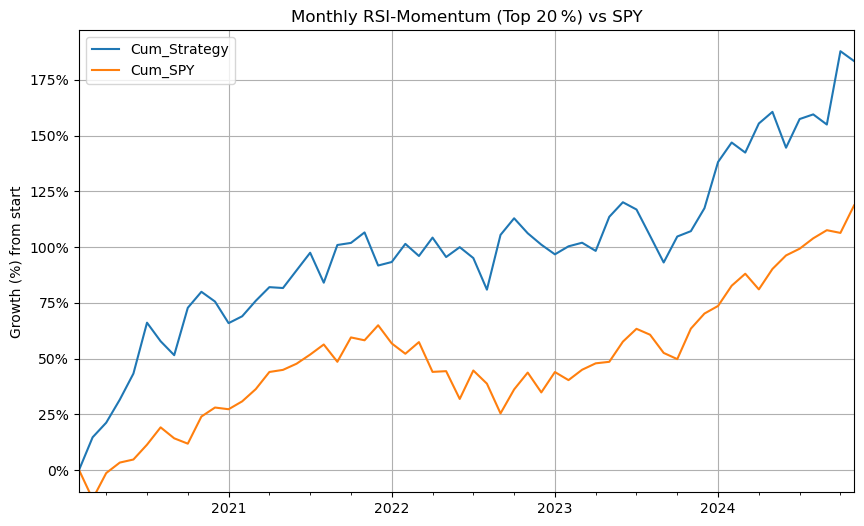

In [411]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,6))
perf_pct.plot(ax=ax)

ax.set_ylim(-10, perf_pct.max().max()*1.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Growth (%) from start")
ax.set_title("Monthly RSI-Momentum (Top 20 %) vs SPY")
ax.grid(True)
plt.show()

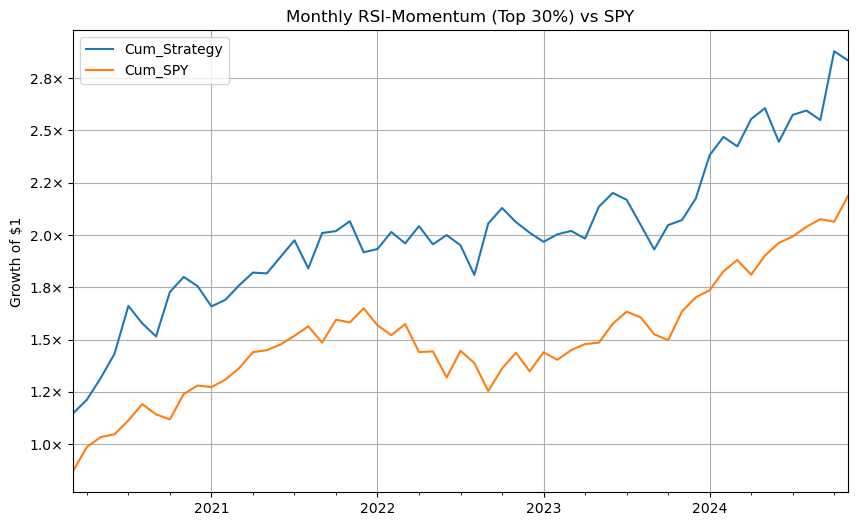

In [413]:
# ── 5) plot
fig, ax = plt.subplots(figsize=(10,6))
perf[['Cum_Strategy','Cum_SPY']].plot(ax=ax)
ax.set_title("Monthly RSI-Momentum (Top 30%) vs SPY")
ax.set_ylabel("Growth of $1")
ax.yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"{x:.1f}×"))
ax.grid(True)
plt.show()

#### Strategy Statistics

In [416]:
def perf_stats(returns, rf=0.0, freq=12):
    """
    returns : pd.Series of strategy *monthly* returns
    rf      : risk-free rate per period (0 means excess return = return)
    """
    excess = returns - rf
    # Annualisation factor
    ann = np.sqrt(freq)
    
    stats = {
        "CAGR": (1 + returns).prod()**(freq / len(returns)) - 1,
        "Annualised Vol":  excess.std(ddof=0) * ann,
        "Sharpe":          excess.mean() / excess.std(ddof=0) * ann,
        "Max Drawdown":    (1 + returns).cumprod().div((1 + returns).cumprod().cummax()).min() - 1,
        "Hit Ratio":       (returns > 0).mean(),
    }
    return pd.Series(stats)

# example
stats_strategy = perf_stats(perf['Strategy'])
stats_spy       = perf_stats(perf['SPY'])
display(pd.concat({"Strategy": stats_strategy, "SPY": stats_spy}, axis=1))


,Strategy,SPY
CAGR,0.245236,0.179018
Annualised Vol,0.199960,0.182354
Sharpe,1.203452,1.000808
Max Drawdown,-0.124297,-0.239722
Hit Ratio,0.614035,0.666667


#### FF5 Model Regression Analysis against Portfolio 6.1

In [422]:
strategy_monthly

,Strategy
date,
2020-02-29,-0.077784
2020-03-31,0.146667
2020-04-30,0.057169
2020-05-31,0.085375
2020-06-30,0.088637
2020-07-31,0.159394
2020-08-31,-0.050075
2020-09-30,-0.039660
2020-10-31,0.140271


In [433]:
strat1_ff5 = (
    strategy_monthly
      .join(ff5, how="inner")   # only keep months common to both
      .dropna()
)
strat1_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF
date,,,,,,,
2020-02-29,-0.077784,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012
2020-03-31,0.146667,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012
2020-04-30,0.057169,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000
2020-05-31,0.085375,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001
2020-06-30,0.088637,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001
2020-07-31,0.159394,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001
2020-08-31,-0.050075,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001
2020-09-30,-0.039660,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001
2020-10-31,0.140271,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001


In [435]:
strat1_ff5["Excess"] = strat1_ff5["Strategy"] - strat1_ff5["RF"]
strat1_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess
date,,,,,,,,
2020-02-29,-0.077784,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012,-0.078984
2020-03-31,0.146667,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012,0.145467
2020-04-30,0.057169,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000,0.057169
2020-05-31,0.085375,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001,0.085275
2020-06-30,0.088637,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001,0.088537
2020-07-31,0.159394,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001,0.159294
2020-08-31,-0.050075,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001,-0.050175
2020-09-30,-0.039660,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001,-0.039760
2020-10-31,0.140271,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001,0.140171


In [443]:
import statsmodels.api as sm

# 1) Define the “X” matrix of predictors (add a constant for the intercept)
X = strat1_ff5[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]
X = sm.add_constant(X)   # insert a column called “const” = 1

# 2) The dependent variable is the excess return
y = strat1_ff5["Excess"]

# 3) Fit OLS
model = sm.OLS(endog=y, exog=X)
results = model.fit(cov_type="HC0")   # HC0 = White’s robust (optional)
                                       # You can also omit cov_type for classic
print(results.summary())

# 4) Intercept (alpha) and its p-value
alpha     = results.params["const"]
alpha_p   = results.pvalues["const"]

# 5) Factor betas and their p‐values
betas     = results.params.drop("const")        # a Series indexed by Mkt-RF, SMB, HML, RMW, CMA
p_values  = results.pvalues.drop("const")

print("\nAlpha (intercept) = {:.6f},  p-value = {:.6f}".format(alpha, alpha_p))
print("\nFactor    Beta    p-value")
for factor in betas.index:
    print(f"  {factor:<6}  {betas[factor]: .6f}  {p_values[factor]: .6f}")

                            OLS Regression Results                            
Dep. Variable:                 Excess   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.2301
Date:                Sat, 07 Jun 2025   Prob (F-statistic):              0.948
Time:                        00:55:51   Log-Likelihood:                 82.856
No. Observations:                  58   AIC:                            -153.7
Df Residuals:                      52   BIC:                            -141.3
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.009      2.054      0.0

In [445]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# (Assuming df is your merged DataFrame with columns: Excess, Mkt-RF, SMB, HML, RMW, CMA)
#
# Note: Because “Mkt-RF” has a hyphen, we must quote it as Q("Mkt-RF") in patsy:
formula = 'Excess ~ Q("Mkt-RF") + SMB + HML + RMW + CMA'

# 1.1 Fit with robust (HC0) errors if you like, or omit that for classic OLS:
model_f = smf.ols(formula, data=df).fit(cov_type="HC0")

# 1.2 Now you can call anova_lm on the formula‐based fit:
anova_results = anova_lm(model_f, typ=1)
print(anova_results)

PatsyError: Error evaluating factor: NameError: name 'RMW' is not defined
    Excess ~ Q("Mkt-RF") + SMB + HML + RMW + CMA
                                       ^^^

Alpha is significant (p-val = 0.04 < 0.05), as this backtested strategy is shown to deliver a positive intercept above the FF risk premiums (~1.86%) i.e. 'true alpha'.

### 6.2 Cross-Sectional Multi-Factor Composite Rank 
Testing a signal that incorporates normalizing a dozen technical/fundamental factors for our top 100 most liquid S&P 500 stocks each month, summing the z-scores into a composite rank, and holding a max-Sharpe-weighted basket of the top 20% stocks, rebalanced each month.

In [450]:
data = data_final.copy()
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  \
date       ticker                                                      
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316   
...                     ...        ...       ...       ...       ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788   

                   return6m  return9m  return12m     fwd1m    Mkt-RF  \
date       ticker                                                      
2020-02-29 AAPL    0.046912  0.051828   0.039912 -0.069761  2.072757   
           ABBV    0.050073  0.017255   0.011287 -0.111072 -0.892548   
           ABT    -0.015540  0.002640   0.000703  0.024406  1.728388   
           ADBE    0.032711  0.027270   0.023065 -0.077886  1.266333   
           AMAT    0.033463  0.047543   0.036675 -0.211631  2.105587   
...                     ...       ...        ...       ...       ...   
2024-11-30 V       0.025185  0.012793   0.017875  0.000730  0.352860   
           VZ      0.017889  0.016840   0.017668 -0.102011  1.212976   
           WFC     0.043123  0.037814   0.047908 -0.075620 -0.479688   
           WMT     0.058010  0.052012   0.049452 -0.018696  1.142680   
           XOM     0.003699  0.016271   0.014410 -0.103425  0.107580   

                        SMB       HML       RMW       CMA          RF  
date       ticker                                                      
2020-02-29 AAPL   -1.079232 -0.246278  1.198616  1.245778  -63.802418  
           ABBV    1.127955  0.960209  3.197204 -0.560284 -163.687882  
           ABT    -0.014953 -1.153537 -1.122504  1.823264   75.968555  
           ADBE   -0.265097  0.548461 -3.159482 -1.296229   18.820235  
           AMAT   -0.956880  0.471108 -0.142658  0.350194   27.214803  
...                     ...       ...       ...       ...         ...  
2024-11-30 V      -0.227321  0.095920 -1.081635 -0.103728   37.608040  
           VZ     -0.723083  0.265871  0.948217  0.911472   46.170145  
           WFC    -0.733040  1.585287 -2.676152 -2.504283  -49.553720  
           WMT     0.874735 -2.295165  2.305642  3.640428   42.623590  
           XOM    -0.587149  1.055187  0.952984 -0.058436  -16.457897  

[5205 rows x 20 columns]

In [452]:
from scipy import stats

factors   = ['rsi', 'macd', 'atr', 'bb_high', 'bb_low', 'bb_mid',
             'garman_klass_vol', 'Mkt-RF', 'SMB', 'HML', 'CMA', 'RMW']

# --- helper: z-score each factor cross-sectionally -----------------
def zscore_cross(df):
    return df.sub(df.mean()).div(df.std(ddof=0))

# ---------------------------------------------------------------
#  A)  Rank-sum composite (simple & robust)
# ---------------------------------------------------------------
def rank_sum_score(data):
    def make_score(one_day):
        z = zscore_cross(one_day[factors])
        return z.sum(axis=1)                         # ticker × 1
    return (data
            .groupby(level='date', group_keys=False)
            .apply(make_score)
            .rename('rank_sum'))

In [454]:
data = data.join(rank_sum_score(data))
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  ...  \
date       ticker                                                     ...   
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360  ...   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286  ...   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622  ...   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945  ...   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316  ...   
...                     ...        ...       ...       ...       ...  ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326  ...   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301  ...   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247  ...   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938  ...   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788  ...   

                   return9m  return12m     fwd1m    Mkt-RF       SMB  \
date       ticker                                                      
2020-02-29 AAPL    0.051828   0.039912 -0.069761  2.072757 -1.079232   
           ABBV    0.017255   0.011287 -0.111072 -0.892548  1.127955   
           ABT     0.002640   0.000703  0.024406  1.728388 -0.014953   
           ADBE    0.027270   0.023065 -0.077886  1.266333 -0.265097   
           AMAT    0.047543   0.036675 -0.211631  2.105587 -0.956880   
...                     ...        ...       ...       ...       ...   
2024-11-30 V       0.012793   0.017875  0.000730  0.352860 -0.227321   
           VZ      0.016840   0.017668 -0.102011  1.212976 -0.723083   
           WFC     0.037814   0.047908 -0.075620 -0.479688 -0.733040   
           WMT     0.052012   0.049452 -0.018696  1.142680  0.874735   
           XOM     0.016271   0.014410 -0.103425  0.107580 -0.587149   

                        HML       RMW       CMA          RF  rank_sum  
date       ticker                                                      
2020-02-29 AAPL   -0.246278  1.198616  1.245778  -63.802418  1.490659  
           ABBV    0.960209  3.197204 -0.560284 -163.687882  0.294131  
           ABT    -1.153537 -1.122504  1.823264   75.968555 -1.531712  
           ADBE    0.548461 -3.159482 -1.296229   18.820235  6.598336  
           AMAT    0.471108 -0.142658  0.350194   27.214803  0.724486  
...                     ...       ...       ...         ...       ...  
2024-11-30 V       0.095920 -1.081635 -0.103728   37.608040  1.072693  
           VZ      0.265871  0.948217  0.911472   46.170145 -6.342079  
           WFC     1.585287 -2.676152 -2.504283  -49.553720 -6.229441  
           WMT    -2.295165  2.305642  3.640428   42.623590  1.959772  
           XOM     1.055187  0.952984 -0.058436  -16.457897 -2.690226  

[5205 rows x 21 columns]

In [456]:
rebalance_dates_rs = {}
top_quantile = 0.2

for dt, day in data.groupby(level='date', group_keys=False):
    # 1) z-score each factor within the cross-section
    z = zscore_cross(day[factors])
    # 2) sum z-scores → composite rank
    rank_sum = z.sum(axis=1)

    N = int(len(rank_sum) * top_quantile)
    if N == 0:
        continue

    # 3) grab tickers as a plain *list* (not an Index!)
    top = (rank_sum.nlargest(N)
           .index.get_level_values('ticker')
           .tolist())

    rebalance_dates_rs[dt] = top

# Inspecting the results
for d, tickers in list(rebalance_dates_rs.items())[:3]:
    print(d, tickers[:5], "...", len(tickers), "tickers")

2020-02-29 00:00:00 ['REGN', 'BKNG', 'BIIB', 'NFLX', 'CHTR'] ... 17 tickers
2020-03-31 00:00:00 ['REGN', 'BKNG', 'BIIB', 'NFLX', 'CHTR'] ... 17 tickers
2020-04-30 00:00:00 ['BKNG', 'REGN', 'CHTR', 'NFLX', 'UNH'] ... 17 tickers


In [458]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

price_hist = {}
for date, tickers in rebalance_dates_rs.items():
    start = (pd.to_datetime(date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    end = (pd.to_datetime(date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    symbols = tickers

    df = (
        yf.download(
            tickers = symbols,
            start = start,
            end = end,
            session = session,
            auto_adjust = False,
            progress = False
        )['Adj Close']
    )
    price_hist[date] = df

price_hist

{Timestamp('2020-02-29 00:00:00'): Ticker            ADBE          BA        BIIB         BKNG       BRK-B  \
 Date                                                                      
 2019-02-28  262.500000  429.655426  328.010010  1678.686768  201.300003   
 2019-03-01  264.010010  430.299988  334.100006  1695.542358  203.130005   
 2019-03-04  258.160004  422.555725  327.260010  1689.350098  201.809998   
 2019-03-05  257.380005  420.045898  326.869995  1727.047974  201.470001   
 2019-03-06  256.399994  414.518463  317.970001  1732.676392  200.669998   
 ...                ...         ...         ...          ...         ...   
 2020-02-21  372.950012  330.380005  336.709991  1907.860962  229.330002   
 2020-02-24  357.410004  317.899994  325.980011  1773.153809  221.690002   
 2020-02-25  347.799988  304.140015  324.109985  1707.907104  218.050003   
 2020-02-26  351.339996  305.589996  327.450012  1660.050415  216.059998   
 2020-02-27  337.519989  287.760010  310.079987  1641.

In [460]:
# ── 2) build a monthly Series of strategy returns (weighted by max-Sharpe, unless facing errors)
strategy_rows = []

for dt, tickers in rebalance_dates_rs.items():
    # 2a) Next‐month returns from your factor table
    cross = data.xs(dt, level='date')
    rets1 = cross.loc[tickers, 'fwd1m']     # Series indexed by ticker

    # 2b) Grab the already‐downloaded last 12 m prices from price_hist:
    price_df = price_hist[dt].copy()[tickers]  # select only our tickers
    # drop any symbols that had no data at all
    price_df = price_df.dropna(axis=1, how='all')

    # 2c) solve for max‐Sharpe weights (fallback to equal‐weight)
    try:
        wdict = optimize_weights(price_df)
        w = pd.Series(wdict)
    except Exception as e:
        print(f"⚠️  Optimization failed on {dt}: {e}")
        w = pd.Series(1 / len(tickers), index=tickers)

    # 2d) portfolio return = Σ wᵢ · return1mᵢ
    port_ret = (w * rets1).sum()
    strategy_rows.append({'date': dt, 'Strategy': port_ret})

strategy_monthly2 = (
    pd.DataFrame(strategy_rows)
      .set_index('date')
      .sort_index()
)
strategy_monthly2

,Strategy
date,
2020-02-29,-0.056864
2020-03-31,0.105024
2020-04-30,0.039226
2020-05-31,0.035041
2020-06-30,0.074167
2020-07-31,0.085622
2020-08-31,-0.058177
2020-09-30,-0.045661
2020-10-31,0.105932


In [462]:
# ── 3) grab SPY monthly returns from yfinance on the same calendar
spy_monthly = yf.download(
    tickers=['SPY'],
    start=strategy_monthly2.index.min() - pd.DateOffset(months=1),
    end  =strategy_monthly2.index.max() + pd.DateOffset(days=1),
    interval='1mo',
    auto_adjust=False, progress=False
)['Adj Close']

# align to month-end
spy_monthly.index = (
    pd.to_datetime(spy_monthly.index)
      .to_period('M')
      .to_timestamp('M')
)

# compute 1-month returns, then select only our rebalance dates
spy_ret = spy_monthly.pct_change().dropna()
spy_ret

Ticker,SPY
Date,
2020-03-31,-0.129987
2020-04-30,0.133610
2020-05-31,0.047645
2020-06-30,0.013276
2020-07-31,0.063552
2020-08-31,0.069797
2020-09-30,-0.041282
2020-10-31,-0.021030
2020-11-30,0.108777


In [464]:
# ── 4) merge and cumulate
perf = strategy_monthly2.join(spy_ret, how='inner')

perf['Cum_Strategy'] = (1 + perf['Strategy']).cumprod()
perf['Cum_SPY']      = (1 + perf['SPY']).cumprod()
perf

,Strategy,SPY,Cum_Strategy,Cum_SPY
2020-03-31,0.105024,-0.129987,1.105024,0.870013
2020-04-30,0.039226,0.133610,1.148370,0.986255
2020-05-31,0.035041,0.047645,1.188611,1.033246
2020-06-30,0.074167,0.013276,1.276767,1.046963
2020-07-31,0.085622,0.063552,1.386086,1.113499
2020-08-31,-0.058177,0.069797,1.305448,1.191218
2020-09-30,-0.045661,-0.041282,1.245840,1.142042
2020-10-31,0.105932,-0.021030,1.377814,1.118025
2020-11-30,0.036134,0.108777,1.427600,1.239640
2020-12-31,0.007772,0.032647,1.438696,1.280110


In [466]:
# 1) percent growth from the Cum_ columns
perf_pct = (perf[['Cum_Strategy','Cum_SPY']] - 1) * 100

# 2) insert a zero‐row one period before the first date
first = perf_pct.index.min()
start = first - pd.DateOffset(months=1)
zero_row = pd.DataFrame([[0.0, 0.0]],
                        index=[start],
                        columns=perf_pct.columns)

perf_pct = pd.concat([zero_row, perf_pct]).sort_index()

# now perf_pct.iloc[0] == 0 for both, and
# perf_pct.iloc[-1] should be ~184 vs ~119
perf_pct

,Cum_Strategy,Cum_SPY
2020-02-29,0.000000,0.000000
2020-03-31,10.502450,-12.998737
2020-04-30,14.837039,-1.374464
2020-05-31,18.861089,3.324563
2020-06-30,27.676693,4.696263
2020-07-31,38.608636,11.349912
2020-08-31,30.544774,19.121768
2020-09-30,24.584021,14.204240
2020-10-31,37.781446,11.802506
2020-11-30,42.760050,23.964029


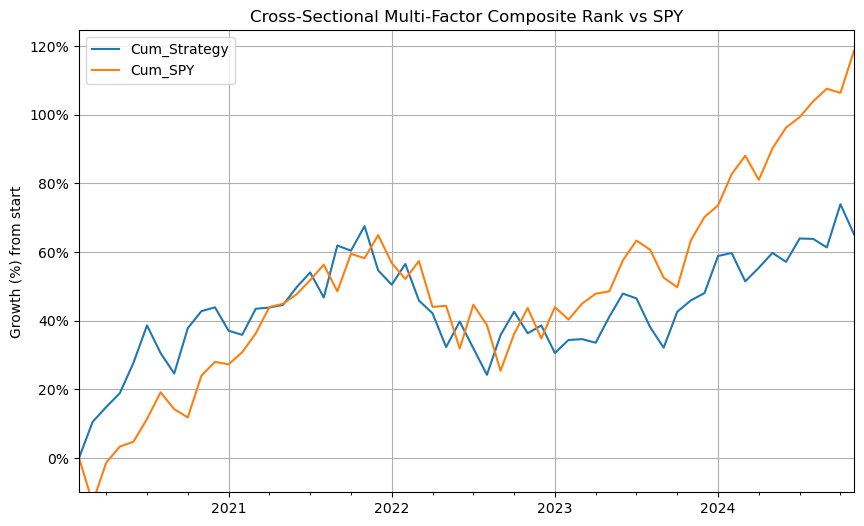

In [468]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,6))
perf_pct.plot(ax=ax)

ax.set_ylim(-10, perf_pct.max().max()*1.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Growth (%) from start")
ax.set_title("Cross-Sectional Multi-Factor Composite Rank vs SPY")
ax.grid(True)
plt.show()

#### Strategy Statistics

In [471]:
def perf_stats(returns, rf=0.0, freq=12):
    """
    returns : pd.Series of strategy *monthly* returns
    rf      : risk-free rate per period (0 means excess return = return)
    """
    excess = returns - rf
    # Annualisation factor
    ann = np.sqrt(freq)
    
    stats = {
        "CAGR": (1 + returns).prod()**(freq / len(returns)) - 1,
        "Annualised Vol":  excess.std(ddof=0) * ann,
        "Sharpe":          excess.mean() / excess.std(ddof=0) * ann,
        "Max Drawdown":    (1 + returns).cumprod().div((1 + returns).cumprod().cummax()).min() - 1,
        "Hit Ratio":       (returns > 0).mean(),
    }
    return pd.Series(stats)

stats_strategy = perf_stats(perf['Strategy'])
stats_spy       = perf_stats(perf['SPY'])
display(pd.concat({"Strategy": stats_strategy, "SPY": stats_spy}, axis=1))

,Strategy,SPY
CAGR,0.111374,0.179018
Annualised Vol,0.174941,0.182354
Sharpe,0.692777,1.000809
Max Drawdown,-0.258445,-0.239722
Hit Ratio,0.578947,0.666667


#### FF5 Model Regression Analysis against Portfolio 6.2

In [474]:
strategy_monthly2

,Strategy
date,
2020-02-29,-0.056864
2020-03-31,0.105024
2020-04-30,0.039226
2020-05-31,0.035041
2020-06-30,0.074167
2020-07-31,0.085622
2020-08-31,-0.058177
2020-09-30,-0.045661
2020-10-31,0.105932


In [476]:
strat2_ff5 = (
    strategy_monthly2
      .join(ff5, how="inner")   # only keep months common to both
      .dropna()
)
strat2_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF
date,,,,,,,
2020-02-29,-0.056864,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012
2020-03-31,0.105024,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012
2020-04-30,0.039226,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000
2020-05-31,0.035041,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001
2020-06-30,0.074167,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001
2020-07-31,0.085622,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001
2020-08-31,-0.058177,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001
2020-09-30,-0.045661,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001
2020-10-31,0.105932,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001


In [478]:
strat2_ff5["Excess"] = strat2_ff5["Strategy"] - strat2_ff5["RF"]
strat2_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess
date,,,,,,,,
2020-02-29,-0.056864,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012,-0.058064
2020-03-31,0.105024,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012,0.103824
2020-04-30,0.039226,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000,0.039226
2020-05-31,0.035041,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001,0.034941
2020-06-30,0.074167,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001,0.074067
2020-07-31,0.085622,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001,0.085522
2020-08-31,-0.058177,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001,-0.058277
2020-09-30,-0.045661,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001,-0.045761
2020-10-31,0.105932,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001,0.105832


In [482]:
import statsmodels.api as sm

# 1) Define the “X” matrix of predictors (add a constant for the intercept)
X = strat2_ff5[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]
X = sm.add_constant(X)   # insert a column called “const” = 1

# 2) The dependent variable is the excess return
y = strat2_ff5["Excess"]

# 3) Fit OLS
model = sm.OLS(endog=y, exog=X)
results = model.fit(cov_type="HC0")   # HC0 = White’s robust (optional)
                                       # You can also omit cov_type for classic
print(results.summary())

# 4) Intercept (alpha) and its p-value
alpha     = results.params["const"]
alpha_p   = results.pvalues["const"]

# 5) Factor betas and their p‐values
betas     = results.params.drop("const")        # a Series indexed by Mkt-RF, SMB, HML, RMW, CMA
p_values  = results.pvalues.drop("const")

print("\nAlpha (intercept) = {:.6f},  p-value = {:.6f}".format(alpha, alpha_p))
print("\nFactor    Beta    p-value")
for factor in betas.index:
    print(f"  {factor:<6}  {betas[factor]: .6f}  {p_values[factor]: .6f}")

                            OLS Regression Results                            
Dep. Variable:                 Excess   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.5838
Date:                Sat, 07 Jun 2025   Prob (F-statistic):              0.712
Time:                        01:36:03   Log-Likelihood:                 91.750
No. Observations:                  58   AIC:                            -171.5
Df Residuals:                      52   BIC:                            -159.1
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.007      1.151      0.2

Alpha is not significant (p-val = 0.25 > 0.05), as this backtested strategy does not deliver a significant positive intercept above the FF risk premiums (~0.8%) i.e. 'true alpha'.

### 6.3 Rolling-IC-Weighted Composite Signal
Testing a signal that computes every technical/fundamental factor's 24-month information coefficient with next-month returns, scaling today's cross-sectional z-scores by those ICs, summing the results into an adaptive composite score, and trading the stocks with the top 20% of scores.

In [487]:
# ---------------------------------------------------------------
#  B)  IC-weighted composite (rolling 24-month window)
# ---------------------------------------------------------------
def ic_weighted_score(data, fwd_col='fwd1m', window=24):
    # 1) daily (monthly) IC per factor
    def daily_ic(one_day):
        return {f: one_day[f].corr(one_day[fwd_col]) for f in factors}
    ic = (data
          .groupby(level='date', group_keys=False)
          .apply(daily_ic)
          .apply(pd.Series)                   # date × factor
          .rolling(window, min_periods=12)
          .mean())                            # 24-period rolling IC
    
    # 2) z-scores for each factor
    z = (data
         .groupby(level='date', group_keys=False)
         .apply(lambda d: zscore_cross(d[factors]))
    )
    
    # 3) multiply z by IC weight of that day
    def weighted(one_day):
        w = ic.loc[one_day.name]
        return (one_day[factors] * w).sum(axis=1)
    return z.groupby(level='date', group_keys=False).apply(weighted).rename('ic_weighted')

In [489]:
data = data.join(ic_weighted_score(data))
data

atr   bb_high    bb_low    bb_mid  garman_klass_vol  \
date       ticker                                                              
2020-02-29 AAPL     2.639027  4.442291  4.226116  4.334204          0.003061   
           ABBV     2.673547  4.406428  4.190030  4.298229         -0.011996   
           ABT      2.046358  4.467015  4.292629  4.379822         -0.001931   
           ADBE    10.300069  5.971017  5.832036  5.901527          0.000579   
           AMAT     2.489953  4.204538  4.002777  4.103658          0.002495   
...                      ...       ...       ...       ...               ...   
2024-11-30 V        4.446017  5.774823  5.680471  5.727647          0.000033   
           VZ       0.708063  3.789544  3.665333  3.727438         -0.000401   
           WFC      1.694352  4.401066  4.166154  4.283610         -0.000048   
           WMT      1.499992  4.533142  4.389388  4.461265          0.000031   
           XOM      2.000357  4.800807  4.742864  4.771836          0.000015   

                       macd        rsi  return1m  return2m  return3m  ...  \
date       ticker                                                     ...   
2020-02-29 AAPL   -1.601281  49.529224 -0.114701 -0.034022  0.008360  ...   
           ABBV    0.198125  51.583173  0.057887 -0.009487 -0.003286  ...   
           ABT    -1.846171  41.630994 -0.105953 -0.056286 -0.032622  ...   
           ADBE    0.197985  54.824442 -0.017144  0.022947  0.036945  ...   
           AMAT   -0.565658  50.513232  0.005400 -0.022676  0.002316  ...   
...                     ...        ...       ...       ...       ...  ...   
2024-11-30 V       6.644490  61.560400  0.089112  0.071509  0.045326  ...   
           VZ      0.519323  56.395768  0.052457  0.001359  0.025301  ...   
           WFC     3.455917  64.334509  0.180051  0.164538  0.094247  ...   
           WMT     2.538331  68.946334  0.128582  0.070285  0.061938  ...   
           XOM     0.112929  51.367220  0.018405  0.007265  0.002788  ...   

                   return12m     fwd1m    Mkt-RF       SMB       HML  \
date       ticker                                                      
2020-02-29 AAPL     0.039912 -0.069761  2.072757 -1.079232 -0.246278   
           ABBV     0.011287 -0.111072 -0.892548  1.127955  0.960209   
           ABT      0.000703  0.024406  1.728388 -0.014953 -1.153537   
           ADBE     0.023065 -0.077886  1.266333 -0.265097  0.548461   
           AMAT     0.036675 -0.211631  2.105587 -0.956880  0.471108   
...                      ...       ...       ...       ...       ...   
2024-11-30 V        0.017875  0.000730  0.352860 -0.227321  0.095920   
           VZ       0.017668 -0.102011  1.212976 -0.723083  0.265871   
           WFC      0.047908 -0.075620 -0.479688 -0.733040  1.585287   
           WMT      0.049452 -0.018696  1.142680  0.874735 -2.295165   
           XOM      0.014410 -0.103425  0.107580 -0.587149  1.055187   

                        RMW       CMA          RF  rank_sum  ic_weighted  
date       ticker                                                         
2020-02-29 AAPL    1.198616  1.245778  -63.802418  1.490659     0.000000  
           ABBV    3.197204 -0.560284 -163.687882  0.294131     0.000000  
           ABT    -1.122504  1.823264   75.968555 -1.531712     0.000000  
           ADBE   -3.159482 -1.296229   18.820235  6.598336     0.000000  
           AMAT   -0.142658  0.350194   27.214803  0.724486     0.000000  
...                     ...       ...         ...       ...          ...  
2024-11-30 V      -1.081635 -0.103728   37.608040  1.072693     0.016778  
           VZ      0.948217  0.911472   46.170145 -6.342079    -0.234908  
           WFC    -2.676152 -2.504283  -49.553720 -6.229441     0.298732  
           WMT     2.305642  3.640428   42.623590  1.959772    -0.441148  
           XOM     0.952984 -0.058436  -16.457897 -2.690226    -0.089812  

[5205 rows x 22 columns]

In [491]:
# -------------------------------------------------------
# 1)  Pre-compute rolling 24-month IC for every factor
# -------------------------------------------------------
window = 24                     # months
fwd    = 'fwd1m'                # future return column
factors = ['rsi','macd','atr','bb_high','bb_low','bb_mid',
           'garman_klass_vol','Mkt-RF','SMB','HML','CMA','RMW']

def daily_ic(one_day):
    return {f : one_day[f].corr(one_day[fwd]) for f in factors}

# date × factor DataFrame of daily ICs
ic_df = (data
         .groupby(level='date', group_keys=False)
         .apply(daily_ic)
         .apply(pd.Series))

# 24-month rolling mean IC
ic_roll = ic_df.rolling(window, min_periods=12).mean()

# -------------------------------------------------------
# 2)  Build rebalance_dates dict using IC-weighted rank
# -------------------------------------------------------
top_quantile = 0.2
rebalance_dates_ic = {}

for dt, day in data.groupby(level='date', group_keys=False):
    w = ic_roll.loc[dt]                       # weight vector today
    z = zscore_cross(day[factors])            # z-scores
    ic_weighted_score = (z * w).sum(axis=1)   # ticker × 1

    N = int(len(ic_weighted_score)*top_quantile)
    if N == 0:
        continue

    top = (ic_weighted_score.nlargest(N)
           .index.get_level_values('ticker')
           .tolist())

    rebalance_dates_ic[dt] = top

for d, t in list(rebalance_dates_ic.items())[:3]:
    print(d, t[:5], '...', len(t))

2020-02-29 00:00:00 ['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMAT'] ... 17
2020-03-31 00:00:00 ['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMAT'] ... 17
2020-04-30 00:00:00 ['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMAT'] ... 17


In [493]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

price_hist = {}
for date, tickers in rebalance_dates.items():
    start = (pd.to_datetime(date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    end = (pd.to_datetime(date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    symbols = tickers

    df = (
        yf.download(
            tickers = symbols,
            start = start,
            end = end,
            session = session,
            auto_adjust = False,
            progress = False
        )['Adj Close']
    )
    price_hist[date] = df

price_hist

{Timestamp('2020-02-29 00:00:00'): Ticker           AAPL       ABBV        ADBE       AMAT        AMD  \
 Date                                                                 
 2019-02-28  41.422657  60.138824  262.500000  35.930206  23.530001   
 2019-03-01  41.858051  60.791508  264.010010  36.136379  23.680000   
 2019-03-04  42.068592  60.305782  258.160004  36.623703  23.370001   
 2019-03-05  41.992031  59.888374  257.380005  36.483139  23.500000   
 2019-03-06  41.750412  59.266026  256.399994  35.677189  22.410000   
 ...               ...        ...         ...        ...        ...   
 2020-02-21  75.871170  76.235855  372.950012  61.214329  53.279999   
 2020-02-24  72.267265  74.774712  357.410004  58.175995  49.119999   
 2020-02-25  69.819420  71.595551  347.799988  56.061543  47.570000   
 2020-02-26  70.927002  70.977371  351.339996  56.966381  47.490002   
 2020-02-27  66.290627  68.576935  337.519989  54.289982  44.009998   
 
 Ticker            AMZN        BIIB      

In [497]:
# ── 2) build a monthly Series of strategy returns (weighted by max-Sharpe, unless facing errors)
strategy_rows = []

for dt, tickers in rebalance_dates.items():
    # 2a) Next‐month returns from your factor table
    cross = data.xs(dt, level='date')
    rets1 = cross.loc[tickers, 'fwd1m']     # Series indexed by ticker

    # 2b) Grab the already‐downloaded last 12 m prices from price_hist:
    price_df = price_hist[dt].copy()[tickers]  # select only our tickers
    # drop any symbols that had no data at all
    price_df = price_df.dropna(axis=1, how='all')

    # 2c) solve for max‐Sharpe weights (fallback to equal‐weight)
    try:
        wdict = optimize_weights(price_df)
        w = pd.Series(wdict)
    except Exception as e:
        print(f"⚠️  Optimization failed on {dt}: {e}")
        w = pd.Series(1 / len(tickers), index=tickers)

    # 2d) portfolio return = Σ wᵢ · return1mᵢ
    port_ret = (w * rets1).sum()
    strategy_rows.append({'date': dt, 'Strategy': port_ret})

strategy_monthly3 = (
    pd.DataFrame(strategy_rows)
      .set_index('date')
      .sort_index()
)
strategy_monthly3

,Strategy
date,
2020-02-29,-0.077784
2020-03-31,0.146667
2020-04-30,0.057169
2020-05-31,0.085375
2020-06-30,0.088637
2020-07-31,0.159394
2020-08-31,-0.050076
2020-09-30,-0.039660
2020-10-31,0.140271


In [499]:
# ── 3) grab SPY monthly returns from yfinance on the same calendar
spy_monthly = yf.download(
    tickers=['SPY'],
    start=strategy_monthly3.index.min() - pd.DateOffset(months=1),
    end  =strategy_monthly3.index.max() + pd.DateOffset(days=1),
    interval='1mo',
    auto_adjust=False, progress=False
)['Adj Close']

# align to month-end
spy_monthly.index = (
    pd.to_datetime(spy_monthly.index)
      .to_period('M')
      .to_timestamp('M')
)

# compute 1-month returns, then select only our rebalance dates
spy_ret = spy_monthly.pct_change().dropna()
spy_ret

Ticker,SPY
Date,
2020-03-31,-0.129987
2020-04-30,0.133610
2020-05-31,0.047645
2020-06-30,0.013276
2020-07-31,0.063552
2020-08-31,0.069797
2020-09-30,-0.041281
2020-10-31,-0.021031
2020-11-30,0.108776


In [501]:
# ── 4) merge and cumulate
perf = strategy_monthly3.join(spy_ret, how='inner')

perf['Cum_Strategy'] = (1 + perf['Strategy']).cumprod()
perf['Cum_SPY']      = (1 + perf['SPY']).cumprod()
perf

,Strategy,SPY,Cum_Strategy,Cum_SPY
2020-03-31,0.146667,-0.129987,1.146667,0.870013
2020-04-30,0.057169,0.133610,1.212220,0.986256
2020-05-31,0.085375,0.047645,1.315713,1.033246
2020-06-30,0.088637,0.013276,1.432334,1.046963
2020-07-31,0.159394,0.063552,1.660639,1.113500
2020-08-31,-0.050076,0.069797,1.577481,1.191218
2020-09-30,-0.039660,-0.041281,1.514917,1.142044
2020-10-31,0.140271,-0.021031,1.727416,1.118026
2020-11-30,0.041571,0.108776,1.799226,1.239641
2020-12-31,-0.024315,0.032647,1.755478,1.280111


In [503]:
# 1) percent growth from the Cum_ columns
perf_pct = (perf[['Cum_Strategy','Cum_SPY']] - 1) * 100

# 2) insert a zero‐row one period before the first date
first = perf_pct.index.min()
start = first - pd.DateOffset(months=1)
zero_row = pd.DataFrame([[0.0, 0.0]],
                        index=[start],
                        columns=perf_pct.columns)

perf_pct = pd.concat([zero_row, perf_pct]).sort_index()

# now perf_pct.iloc[0] == 0 for both, and
# perf_pct.iloc[-1] should be ~184 vs ~119
perf_pct

,Cum_Strategy,Cum_SPY
2020-02-29,0.000000,0.000000
2020-03-31,14.666662,-12.998704
2020-04-30,21.221991,-1.374420
2020-05-31,31.571285,3.324642
2020-06-30,43.233356,4.696331
2020-07-31,66.063878,11.349962
2020-08-31,57.748067,19.121821
2020-09-30,51.491738,14.204369
2020-10-31,72.741584,11.802578
2020-11-30,79.922638,23.964062


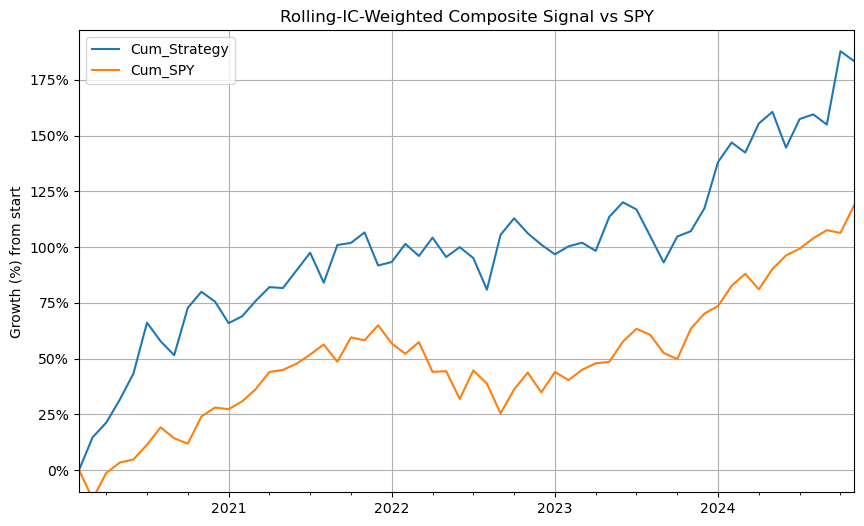

In [505]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10,6))
perf_pct.plot(ax=ax)

ax.set_ylim(-10, perf_pct.max().max()*1.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Growth (%) from start")
ax.set_title("Rolling-IC-Weighted Composite Signal vs SPY")
ax.grid(True)
plt.show()

#### Strategy Statistics

In [508]:
def perf_stats(returns, rf=0.0, freq=12):
    """
    returns : pd.Series of strategy *monthly* returns
    rf      : risk-free rate per period (0 means excess return = return)
    """
    excess = returns - rf
    # Annualisation factor
    ann = np.sqrt(freq)
    
    stats = {
        "CAGR": (1 + returns).prod()**(freq / len(returns)) - 1,
        "Annualised Vol":  excess.std(ddof=0) * ann,
        "Sharpe":          excess.mean() / excess.std(ddof=0) * ann,
        "Max Drawdown":    (1 + returns).cumprod().div((1 + returns).cumprod().cummax()).min() - 1,
        "Hit Ratio":       (returns > 0).mean(),
    }
    return pd.Series(stats)

stats_strategy = perf_stats(perf['Strategy'])
stats_spy       = perf_stats(perf['SPY'])
display(pd.concat({"Strategy": stats_strategy, "SPY": stats_spy}, axis=1))

,Strategy,SPY
CAGR,0.245236,0.179018
Annualised Vol,0.199960,0.182353
Sharpe,1.203451,1.000810
Max Drawdown,-0.124296,-0.239722
Hit Ratio,0.614035,0.666667


In [510]:
import empyrical as ep

# monthly returns series
strat_ret = perf['Strategy']
spy_ret   = perf['SPY']

def empyrical_stats(returns, rf=0.0, freq=12):
    return pd.Series({
        "CAGR":            ep.annual_return(returns, period='monthly'),
        "Annualised Vol":  ep.annual_volatility(returns, period='monthly'),
        "Sharpe":          ep.sharpe_ratio(returns, risk_free=rf, period='monthly'),
        "Sortino":         ep.sortino_ratio(returns, period='monthly'),
        "Max Drawdown":    ep.max_drawdown(returns),
        "Calmar":          ep.calmar_ratio(returns, period='monthly'),
        "Hit Ratio":       (returns > 0).mean()
    })

stats = pd.concat({
    "Strategy": empyrical_stats(strat_ret),
    "SPY":      empyrical_stats(spy_ret)
}, axis=1)

display(stats.style.format("{:+.2%}"))

,Strategy,SPY
CAGR,+24.52%,+17.90%
Annualised Vol,+20.17%,+18.40%
Sharpe,+119.28%,+99.20%
Sortino,+263.52%,+162.94%
Max Drawdown,-12.43%,-23.97%
Calmar,+197.30%,+74.68%
Hit Ratio,+61.40%,+66.67%


#### FF5 Model Regression Analysis against Portfolio 6.3

In [512]:
strat3_ff5 = (
    strategy_monthly3
      .join(ff5, how="inner")   # only keep months common to both
      .dropna()
)
strat3_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF
date,,,,,,,
2020-02-29,-0.077784,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012
2020-03-31,0.146667,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012
2020-04-30,0.057169,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000
2020-05-31,0.085375,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001
2020-06-30,0.088637,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001
2020-07-31,0.159394,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001
2020-08-31,-0.050076,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001
2020-09-30,-0.039660,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001
2020-10-31,0.140271,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001


In [514]:
strat3_ff5["Excess"] = strat3_ff5["Strategy"] - strat3_ff5["RF"]
strat3_ff5

,Strategy,Mkt-RF,SMB,HML,RMW,CMA,RF,Excess
date,,,,,,,,
2020-02-29,-0.077784,-0.0815,0.0008,-0.0382,-0.0143,-0.0253,0.0012,-0.078984
2020-03-31,0.146667,-0.1334,-0.0818,-0.1383,-0.0161,0.0120,0.0012,0.145467
2020-04-30,0.057169,0.1358,0.0257,-0.0134,0.0276,-0.0102,0.0000,0.057169
2020-05-31,0.085375,0.0559,0.0192,-0.0500,0.0096,-0.0315,0.0001,0.085275
2020-06-30,0.088637,0.0244,0.0195,-0.0217,0.0014,0.0055,0.0001,0.088537
2020-07-31,0.159394,0.0583,-0.0317,-0.0141,0.0038,0.0094,0.0001,0.159294
2020-08-31,-0.050076,0.0762,-0.0090,-0.0301,0.0427,-0.0149,0.0001,-0.050176
2020-09-30,-0.039660,-0.0364,0.0000,-0.0271,-0.0138,-0.0191,0.0001,-0.039760
2020-10-31,0.140271,-0.0208,0.0466,0.0417,-0.0077,-0.0057,0.0001,0.140171


In [516]:
import statsmodels.api as sm

# 1) Define the “X” matrix of predictors (add a constant for the intercept)
X = strat3_ff5[["Mkt-RF", "SMB", "HML", "RMW", "CMA"]]
X = sm.add_constant(X)   # insert a column called “const” = 1

# 2) The dependent variable is the excess return
y = strat3_ff5["Excess"]

# 3) Fit OLS
model = sm.OLS(endog=y, exog=X)
results = model.fit(cov_type="HC0")   # HC0 = White’s robust (optional)
                                       # You can also omit cov_type for classic
print(results.summary())

# 4) Intercept (alpha) and its p-value
alpha     = results.params["const"]
alpha_p   = results.pvalues["const"]

# 5) Factor betas and their p‐values
betas     = results.params.drop("const")        # a Series indexed by Mkt-RF, SMB, HML, RMW, CMA
p_values  = results.pvalues.drop("const")

print("\nAlpha (intercept) = {:.6f},  p-value = {:.6f}".format(alpha, alpha_p))
print("\nFactor    Beta    p-value")
for factor in betas.index:
    print(f"  {factor:<6}  {betas[factor]: .6f}  {p_values[factor]: .6f}")

                            OLS Regression Results                            
Dep. Variable:                 Excess   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.2301
Date:                Sat, 07 Jun 2025   Prob (F-statistic):              0.948
Time:                        01:43:21   Log-Likelihood:                 82.856
No. Observations:                  58   AIC:                            -153.7
Df Residuals:                      52   BIC:                            -141.3
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0187      0.009      2.054      0.0

Same as Portfolio 6.1

Alpha is significant (p-val = 0.04 < 0.05), as this backtested strategy is shown to deliver a positive intercept above the FF risk premiums (~1.86%) i.e. 'true alpha'.

### Pure Price Momentum Plot

In [2544]:
top_q = 0.5   # pick top 20%
# backtest dates are the month‐ends in your `data` index

# --- 1) build the momentum scores & pick winners each month ---
strategy_rows = []
for dt, month in data.groupby(level="date", group_keys=False):
    N = max(1, int(len(month) * top_q))
    
    # 1a) 12 m total return cross‐section
    ret12 = month["return12m"]
    
    # 1b) optional: risk‐adjusted score = 12m return / vol over last 12m
    # we need the daily std of returns from price_hist[dt]:
    # (assumes price_hist[dt] is a DataFrame of daily Adj Close for last 12 m)
    price_df = price_hist[dt]
    daily_rets = price_df.pct_change().dropna(how="all")
    vol6m = daily_rets.std() * np.sqrt(252)  # annualized if you like
    
    score = ret12            .copy()        # pure momentum
    #score = ret12.div(vol6m)   .nlargest(N) # <-- risk-adjusted momentum
    
    # 1c) pick the top‐N by whatever `score` is
    winners = score.nlargest(N).index

    # 1d) compute our next‐month return = mean of their 1 m returns
    ret1 = month.loc[winners, "return1m"]
    strategy_rows.append({"date": dt,
                          "Strategy": ret1.mean()})

strategy_monthly = (
    pd.DataFrame(strategy_rows)
      .set_index("date")
      .sort_index()
)
strategy_monthly

,Strategy
date,
2020-07-31,0.097941
2020-08-31,0.146567
2020-09-30,-0.049560
2020-10-31,-0.029661
2020-11-30,0.123084
2020-12-31,0.055460
2021-01-31,-0.005234
2021-02-28,0.043211
2021-03-31,0.031071


In [2545]:
# --- 2) fetch SPY monthly returns on the same calendar ---
spy = (
    yf.download(
       tickers=["SPY"],
       start = strategy_monthly.index.min() - pd.DateOffset(months=1),
       end   = strategy_monthly.index.max() + pd.DateOffset(days=1),
       interval="1mo", auto_adjust=False, progress=False
    )["Adj Close"]
)
spy.index = (
    pd.to_datetime(spy.index)
      .to_period("M")
      .to_timestamp("M")
)
spy_ret = spy.pct_change().reindex(strategy_monthly.index)
spy_ret

Ticker,SPY
date,
2020-07-31,NaN
2020-08-31,0.069797
2020-09-30,-0.041281
2020-10-31,-0.021030
2020-11-30,0.108777
2020-12-31,0.032647
2021-01-31,-0.005971
2021-02-28,0.027806
2021-03-31,0.041987


In [2546]:
# --- 3) merge & cumulate ---
perf = strategy_monthly.join(spy_ret, how="inner")
perf["Cum_Strategy"] = (1 + perf["Strategy"]).cumprod()
perf["Cum_SPY"]      = (1 + perf["SPY"])     .cumprod()
perf

,Strategy,SPY,Cum_Strategy,Cum_SPY
date,,,,
2020-07-31,0.097941,NaN,1.097941,NaN
2020-08-31,0.146567,0.069797,1.258863,1.069797
2020-09-30,-0.049560,-0.041281,1.196473,1.025634
2020-10-31,-0.029661,-0.021030,1.160985,1.004064
2020-11-30,0.123084,0.108777,1.303883,1.113283
2020-12-31,0.055460,0.032647,1.376196,1.149628
2021-01-31,-0.005234,-0.005971,1.368993,1.142763
2021-02-28,0.043211,0.027806,1.428149,1.174539
2021-03-31,0.031071,0.041987,1.472522,1.223853


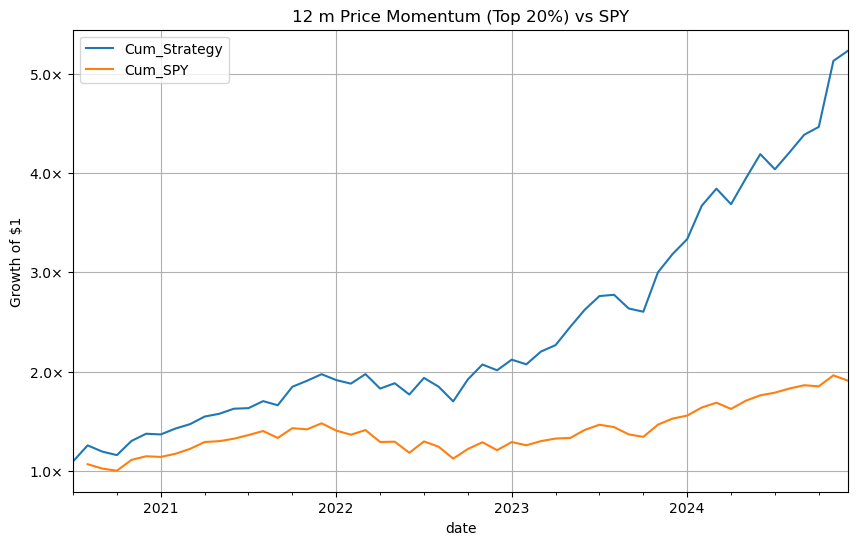

In [2550]:
# --- 4) plot ---
fig, ax = plt.subplots(figsize=(10,6))
perf[["Cum_Strategy","Cum_SPY"]].plot(ax=ax)
ax.set_title("12 m Price Momentum (Top 20%) vs SPY")
ax.set_ylabel("Growth of $1")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"{x:.1f}×"))
ax.grid(True)
plt.show()

In [2526]:
# % of names to go long each month
top_quantile = 0.2  

rebalance_dates = {}

for date, month in data.groupby(level='date', group_keys=False):
    N = int(len(month) * top_quantile)
    if N < 1:
        continue

    # pick the N names with the Highest 12-month return
    top_mom = (
        month
        .nlargest(N, 'return12m')                       # rank by return12m
        .index
        .get_level_values('ticker')
        .tolist()
    )
    rebalance_dates[date] = top_mom

# quick sanity check
for d, tickers in list(rebalance_dates.items())[:3]:
    print(d, tickers[:5], "...", len(tickers), "tickers")


2020-07-31 00:00:00 ['TSLA', 'AMD', 'NVDA', 'AAPL', 'PYPL'] ... 8 tickers
2020-08-31 00:00:00 ['TSLA', 'NVDA', 'AMD', 'AAPL', 'AMZN'] ... 9 tickers
2020-09-30 00:00:00 ['TSLA', 'NVDA', 'AMD', 'AAPL', 'PYPL'] ... 9 tickers


In [2313]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

price_hist = {}
for date, tickers in rebalance_dates.items():
    start = (pd.to_datetime(date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    end = (pd.to_datetime(date)).strftime('%Y-%m-%d')

    # Include SPY as benchmark
    symbols = tickers + ['SPY']

    df = (
        yf.download(
            tickers = symbols,
            start = start,
            end = end,
            session = session,
            auto_adjust = False,
            progress = False
        )['Adj Close']
    )
    price_hist[date] = df

price_hist

{Timestamp('2020-07-31 00:00:00'): Ticker           AAPL       ABBV        ADBE        ADSK        ALGN  \
 Date                                                                   
 2019-07-31  51.161808  52.012539  298.859985  156.169998  209.080002   
 2019-08-01  50.054707  51.372322  298.440002  153.470001  202.350006   
 2019-08-02  48.995640  51.021000  293.709991  147.759995  199.380005   
 2019-08-05  46.430828  50.927311  280.359985  143.570007  188.369995   
 2019-08-06  47.309776  50.568165  286.209991  143.669998  188.440002   
 ...               ...        ...         ...         ...         ...   
 2020-07-24  90.028168  80.090363  430.309998  232.880005  298.140015   
 2020-07-27  92.161880  80.131615  437.100006  239.690002  308.750000   
 2020-07-28  90.647888  79.760483  432.260010  234.580002  299.109985   
 2020-07-29  92.385437  80.007904  436.299988  238.610001  300.239990   
 2020-07-30  93.503334  79.207901  438.880005  236.100006  296.130005   
 
 Ticker        

In [2315]:
strategy_slices = []

for rebalance_date, tickers in rebalance_dates.items():
    # grab exactly the tickers you chose that month
    df_prices = price_hist[rebalance_date][tickers]  

    # simple equal weights (1/N each)
    w = pd.Series(1/len(tickers), index=tickers)

    # 1) compute daily simple returns
    rets = df_prices.pct_change().dropna(how='all')

    # 2) portfolio daily return = dot(weights, returns)
    rets['Strategy'] = rets.dot(w)

    # 3) tag with the rebalance date and flatten
    strat = (
        rets[['Strategy']]
          .assign(rebalance_date=rebalance_date)
          .set_index('rebalance_date', append=True)
          .swaplevel(0,1)
    )
    strategy_slices.append(strat)

# 4) concatenate all days into one Series and dedupe
portfolio_daily = (
    pd.concat(strategy_slices)['Strategy']
      .sort_index()
      .loc[lambda x: ~x.index.duplicated(keep='first')]
)

# 5) flatten off the rebalance_date index level
strat_u = portfolio_daily.reset_index('rebalance_date', drop=True)

In [2316]:
strat_u

Date
2019-08-01   -0.005443
2019-08-02   -0.010579
2019-08-05   -0.031236
2019-08-06    0.012378
2019-08-07    0.002852
                ...   
2024-12-23    0.007622
2024-12-24    0.017949
2024-12-26   -0.000390
2024-12-27   -0.013366
2024-12-30   -0.011054
Name: Strategy, Length: 13532, dtype: float64

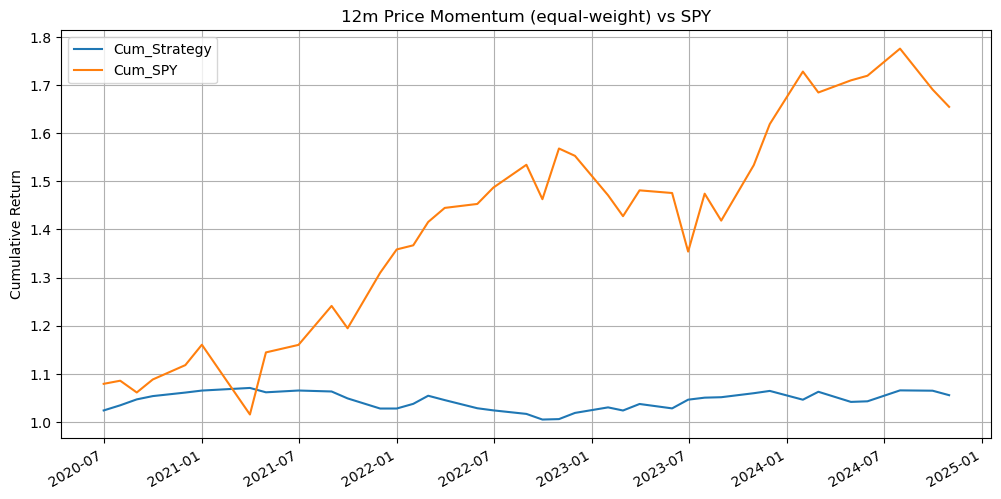

In [2319]:
# 1) flatten & dedupe strategy
strat_u = (
    portfolio_daily
    .reset_index('rebalance_date', drop=True)
    .rename('Strategy')
)
strat_u = strat_u[~strat_u.index.duplicated(keep='first')]

# 2) dedupe SPY
spy_u = spy_ret_daily.rename('SPY')
spy_u = spy_u[~spy_u.index.duplicated(keep='first')]

# 3) now safe to inner‐join
daily_perf = (
    pd.concat([strat_u, spy_u], axis=1, join='inner')
      .dropna()
)

# 4) cumulative P&L
daily_perf['Cum_Strategy'] = (1 + daily_perf['Strategy']).cumprod()
daily_perf['Cum_SPY']      = (1 + daily_perf['SPY']).cumprod()

# 5) plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
daily_perf[['Cum_Strategy','Cum_SPY']].plot(ax=ax)
ax.set_title("12m Price Momentum (equal-weight) vs SPY")
ax.set_ylabel("Cumulative Return")
ax.grid(True)
plt.show()

In [2321]:
print("Strategy dates:", strat_u.index.min(), strat_u.index.max(), "→", len(strat_u))
print("SPY dates:",     spy_u.index.min(),   spy_u.index.max(),   "→", len(spy_u))

common = strat_u.index.intersection(spy_u.index)
print("Intersection length:", len(common))


Strategy dates: 2019-08-01 00:00:00 2024-12-30 00:00:00 → 1363
SPY dates: 2020-06-30 00:00:00 2024-12-31 00:00:00 → 55
Intersection length: 38
